In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2022-complete-co2-emissions/owid-co2-data.csv
/kaggle/input/2022-complete-co2-emissions/owid-co2-codebook.csv
/kaggle/input/pandemic-details-of-world/pandemic_details_of_world.csv


In [104]:
df=pd.read_csv("/kaggle/input/pandemic-details-of-world/pandemic_details_of_world.csv")

In [105]:
df.head()

,Unnamed: 0,Epidemics/pandemics,Disease,Death toll,Date,Location
0,0,Black Death,Bubonic plague,75–200 million,1346–1353,"Europe, Asia, and North Africa"
1,1,Spanish flu,Influenza A/H1N1,17–100 million,1918–1920,Worldwide
2,2,Plague of Justinian,Bubonic plague,15–100 million,541–549,"North Africa, Europe and Western Asia"
3,3,HIV/AIDS epidemic,HIV/AIDS,40.1 million (as of 2021,1981–present,Worldwide
4,4,COVID-19 pandemic,COVID-19,7–28.3 million (as of December 2022,2019[c]–present,Worldwide


In [106]:
df.tail()

,Unnamed: 0,Epidemics/pandemics,Disease,Death toll,Date,Location
267,267,2020 Nigeria yellow fever epidemic,Yellow fever,296 (as of 31 December 2020),2020,Nigeria
268,268,2021 India black fungus epidemic,Black fungus (COVID-19 condition),4332,2021-2022,India
269,269,2022 hepatitis of unknown origin in children,Hepatitis by Adenovirus variant AF41 (Unconfir...,18,2021–2022,Worldwide
270,270,2022–2023 monkeypox outbreak,Monkeypox virus,280,2022–present,Worldwide
271,271,2022 Uganda Ebola outbreak,Sudan ebolavirus,77,2022–2023,Uganda


In [107]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Epidemics/pandemics  272 non-null    object
 1   Disease              272 non-null    object
 2   Death toll           272 non-null    object
 3   Date                 272 non-null    object
 4   Location             272 non-null    object
dtypes: object(5)
memory usage: 10.8+ KB


In [109]:
import re
import pandas as pd

# Function to clean and extract numerical values from the Death toll column
def extract_numerical_value(death_toll):
    # Extract numerical values using regular expression
    numerical_values = re.findall(r'\d+\.\d+|\d+', death_toll)
    
    # If multiple numerical values are present, return the average
    if numerical_values:
        return sum(map(float, numerical_values)) / len(numerical_values)
    else:
        return None

# Apply the function to clean the Death toll column
df['Death toll'] = df['Death toll'].apply(extract_numerical_value)

# Display the cleaned DataFrame
df.head()


,Epidemics/pandemics,Disease,Death toll,Date,Location
0,Black Death,Bubonic plague,137.500000,1346–1353,"Europe, Asia, and North Africa"
1,Spanish flu,Influenza A/H1N1,58.500000,1918–1920,Worldwide
2,Plague of Justinian,Bubonic plague,57.500000,541–549,"North Africa, Europe and Western Asia"
3,HIV/AIDS epidemic,HIV/AIDS,1030.550000,1981–present,Worldwide
4,COVID-19 pandemic,COVID-19,685.766667,2019[c]–present,Worldwide


In [110]:
# Display unique values in the "Date" column
unique_dates = df['Date'].unique()
print(unique_dates)


['1346–1353' '1918–1920' '541–549' '1981–present' '2019[c]–present'
 '1855–1960' '1545–1548' '165–180 (possibly up to 190)' '1519–1520'
 '1918–1922' '1957–1958' '1968–1969' '1576–1580' '735–737' '1772–1773'
 '1656–1658' '1846–1860' '1629–1631' '1889−1890' '1350 BC' '430–426 BC'
 '412 BC' '217' '249–262' '590' '627–628' '638–639' '664–689' '698–701'
 '746–747' '1485–1551' '1489' '1510' '1557–1559' '1561–1562' '1563–1564'
 '1582–1583' '1592–1596' '1592–1593' '1596–1602' '1600–1650' '1603'
 '1616–1620' '1632–1635' '1633–1634' '1634–1640' '1636–1637' '1633–1644'
 '1647–1652' '1648' '1663–1664' '1665–1666' '1668' '1675–1676' '1676–1685'
 '1677–1678' '1679' '1681' '1687' '1693' '1699' '1702' '1702–1703'
 '1707–1709' '1710–1712' '1713–1715' '1720–1722' '1721–1722' '1730'
 '1732–1733' '1733' '1735–1741' '1738' '1738–1739' '1741' '1743' '1759'
 '1760' '1762' '1763' '1770–1772' '1772' '1775–1776' '1775–1782' '1778'
 '1788' '1789–1790' '1793' '1800–1803' '1801' '1802–1803' '1812'
 '1812–1819' '18

In [111]:
import pandas as pd
import numpy as np
import re

# Convert 'NaT' values to NaN
df['Date'] = df['Date'].replace('NaT', np.nan)

# Convert "Death toll" to a numeric format
df['Death toll'] = pd.to_numeric(df['Death toll'], errors='coerce')


# Display the unique values in the "Date" column after cleaning
unique_dates = df['Date'].unique()
print(unique_dates)


['1346–1353' '1918–1920' '541–549' '1981–present' '2019[c]–present'
 '1855–1960' '1545–1548' '165–180 (possibly up to 190)' '1519–1520'
 '1918–1922' '1957–1958' '1968–1969' '1576–1580' '735–737' '1772–1773'
 '1656–1658' '1846–1860' '1629–1631' '1889−1890' '1350 BC' '430–426 BC'
 '412 BC' '217' '249–262' '590' '627–628' '638–639' '664–689' '698–701'
 '746–747' '1485–1551' '1489' '1510' '1557–1559' '1561–1562' '1563–1564'
 '1582–1583' '1592–1596' '1592–1593' '1596–1602' '1600–1650' '1603'
 '1616–1620' '1632–1635' '1633–1634' '1634–1640' '1636–1637' '1633–1644'
 '1647–1652' '1648' '1663–1664' '1665–1666' '1668' '1675–1676' '1676–1685'
 '1677–1678' '1679' '1681' '1687' '1693' '1699' '1702' '1702–1703'
 '1707–1709' '1710–1712' '1713–1715' '1720–1722' '1721–1722' '1730'
 '1732–1733' '1733' '1735–1741' '1738' '1738–1739' '1741' '1743' '1759'
 '1760' '1762' '1763' '1770–1772' '1772' '1775–1776' '1775–1782' '1778'
 '1788' '1789–1790' '1793' '1800–1803' '1801' '1802–1803' '1812'
 '1812–1819' '18

In [112]:

print(df.head())


   Epidemics/pandemics           Disease   Death toll             Date  \
0          Black Death    Bubonic plague   137.500000        1346–1353   
1          Spanish flu  Influenza A/H1N1    58.500000        1918–1920   
2  Plague of Justinian    Bubonic plague    57.500000          541–549   
3    HIV/AIDS epidemic          HIV/AIDS  1030.550000     1981–present   
4    COVID-19 pandemic          COVID-19   685.766667  2019[c]–present   

                                Location  
0         Europe, Asia, and North Africa  
1                              Worldwide  
2  North Africa, Europe and Western Asia  
3                              Worldwide  
4                              Worldwide  


In [113]:
df["Location"].unique()

array(['Europe, Asia, and North Africa', 'Worldwide',
       'North Africa, Europe and Western Asia', 'Mexico', 'Roman Empire',
       'Russia', 'Japan', 'Persia', 'Southern Italy', 'Italy', '–',
       'Megiddo, land of Canaan', 'Greece, Libya, Egypt, Ethiopia',
       'Greece (Northern Greece, Roman Republic)', 'Han Dynasty',
       'Europe', 'Europe and West Asia', 'Rome, Byzantine Empire',
       'Bilad al-Sham', 'Byzantine Empire, West Asia, Africa',
       'British Isles', 'Byzantine Empire, West Asia, Syria, Mesopotamia',
       'Eurasia and North Africa',
       'Britain (England) and later continental Europe', 'Spain',
       'Asia, North Africa, Europe', 'Asia, Africa, Europe, and Americas',
       'Chile', 'London, England', 'Tenerife, Spain',
       'Seneca nation, North America', 'Malta', 'South America',
       'Southern New England, British North America, especially the Wampanoag people',
       'Augsburg, Germany', 'Massachusetts Bay Colony, Thirteen Colonies',
       '

In [114]:
df[df["Location"]=='Worldwide']

,Epidemics/pandemics,Disease,Death toll,Date,Location
1,Spanish flu,Influenza A/H1N1,58.500000,1918–1920,Worldwide
3,HIV/AIDS epidemic,HIV/AIDS,1030.550000,1981–present,Worldwide
4,COVID-19 pandemic,COVID-19,685.766667,2019[c]–present,Worldwide
5,Third plague pandemic,Bubonic plague,13.500000,1855–1960,Worldwide
10,1957–1958 influenza pandemic,Influenza A/H2N2,2.500000,1957–1958,Worldwide
11,Hong Kong flu,Influenza A/H3N2,2.500000,1968–1969,Worldwide
16,1846–1860 cholera pandemic,Cholera,1.000000,1846–1860,Worldwide
120,1847–1848 influenza epidemic,Influenza,NaN,1847–1848,Worldwide
123,Third cholera pandemic,Cholera,1.000000,1846–1860,Worldwide
128,Third plague pandemic,Bubonic plague,13.500000,1855–1960,Worldwide


In [115]:
df[df["Location"]=='Worldwide'].nunique()

Epidemics/pandemics    23
Disease                23
Death toll             17
Date                   21
Location                1
dtype: int64

In [116]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [117]:
df['Date'] = df['Date'].replace('165–180 (possibly up to 190)', '190')


In [118]:
df[["Start Date","End Date"]]=df.Date.str.split(("-") and ("–"),expand=True)
df

,Epidemics/pandemics,Disease,Death toll,Date,Location,Start Date,End Date
0,Black Death,Bubonic plague,137.500000,1346–1353,"Europe, Asia, and North Africa",1346,1353
1,Spanish flu,Influenza A/H1N1,58.500000,1918–1920,Worldwide,1918,1920
2,Plague of Justinian,Bubonic plague,57.500000,541–549,"North Africa, Europe and Western Asia",541,549
3,HIV/AIDS epidemic,HIV/AIDS,1030.550000,1981–present,Worldwide,1981,present
4,COVID-19 pandemic,COVID-19,685.766667,2019[c]–present,Worldwide,2019[c],present
...,...,...,...,...,...,...,...
267,2020 Nigeria yellow fever epidemic,Yellow fever,782.333333,2020,Nigeria,2020,None
268,2021 India black fungus epidemic,Black fungus (COVID-19 condition),4332.000000,2021-2022,India,2021-2022,None
269,2022 hepatitis of unknown origin in children,Hepatitis by Adenovirus variant AF41 (Unconfir...,18.000000,2021–2022,Worldwide,2021,2022
270,2022–2023 monkeypox outbreak,Monkeypox virus,280.000000,2022–present,Worldwide,2022,present


In [119]:
df['End Date']=df['End Date'].replace("present","2023")
df

,Epidemics/pandemics,Disease,Death toll,Date,Location,Start Date,End Date
0,Black Death,Bubonic plague,137.500000,1346–1353,"Europe, Asia, and North Africa",1346,1353
1,Spanish flu,Influenza A/H1N1,58.500000,1918–1920,Worldwide,1918,1920
2,Plague of Justinian,Bubonic plague,57.500000,541–549,"North Africa, Europe and Western Asia",541,549
3,HIV/AIDS epidemic,HIV/AIDS,1030.550000,1981–present,Worldwide,1981,2023
4,COVID-19 pandemic,COVID-19,685.766667,2019[c]–present,Worldwide,2019[c],2023
...,...,...,...,...,...,...,...
267,2020 Nigeria yellow fever epidemic,Yellow fever,782.333333,2020,Nigeria,2020,None
268,2021 India black fungus epidemic,Black fungus (COVID-19 condition),4332.000000,2021-2022,India,2021-2022,None
269,2022 hepatitis of unknown origin in children,Hepatitis by Adenovirus variant AF41 (Unconfir...,18.000000,2021–2022,Worldwide,2021,2022
270,2022–2023 monkeypox outbreak,Monkeypox virus,280.000000,2022–present,Worldwide,2022,2023


In [120]:
df['Start Date']=df['Start Date'].replace("2019[c]","2019")
df

,Epidemics/pandemics,Disease,Death toll,Date,Location,Start Date,End Date
0,Black Death,Bubonic plague,137.500000,1346–1353,"Europe, Asia, and North Africa",1346,1353
1,Spanish flu,Influenza A/H1N1,58.500000,1918–1920,Worldwide,1918,1920
2,Plague of Justinian,Bubonic plague,57.500000,541–549,"North Africa, Europe and Western Asia",541,549
3,HIV/AIDS epidemic,HIV/AIDS,1030.550000,1981–present,Worldwide,1981,2023
4,COVID-19 pandemic,COVID-19,685.766667,2019[c]–present,Worldwide,2019,2023
...,...,...,...,...,...,...,...
267,2020 Nigeria yellow fever epidemic,Yellow fever,782.333333,2020,Nigeria,2020,None
268,2021 India black fungus epidemic,Black fungus (COVID-19 condition),4332.000000,2021-2022,India,2021-2022,None
269,2022 hepatitis of unknown origin in children,Hepatitis by Adenovirus variant AF41 (Unconfir...,18.000000,2021–2022,Worldwide,2021,2022
270,2022–2023 monkeypox outbreak,Monkeypox virus,280.000000,2022–present,Worldwide,2022,2023


In [121]:
df['End Date']=df['End Date'].replace("None","np.NaN")
df

,Epidemics/pandemics,Disease,Death toll,Date,Location,Start Date,End Date
0,Black Death,Bubonic plague,137.500000,1346–1353,"Europe, Asia, and North Africa",1346,1353
1,Spanish flu,Influenza A/H1N1,58.500000,1918–1920,Worldwide,1918,1920
2,Plague of Justinian,Bubonic plague,57.500000,541–549,"North Africa, Europe and Western Asia",541,549
3,HIV/AIDS epidemic,HIV/AIDS,1030.550000,1981–present,Worldwide,1981,2023
4,COVID-19 pandemic,COVID-19,685.766667,2019[c]–present,Worldwide,2019,2023
...,...,...,...,...,...,...,...
267,2020 Nigeria yellow fever epidemic,Yellow fever,782.333333,2020,Nigeria,2020,None
268,2021 India black fungus epidemic,Black fungus (COVID-19 condition),4332.000000,2021-2022,India,2021-2022,None
269,2022 hepatitis of unknown origin in children,Hepatitis by Adenovirus variant AF41 (Unconfir...,18.000000,2021–2022,Worldwide,2021,2022
270,2022–2023 monkeypox outbreak,Monkeypox virus,280.000000,2022–present,Worldwide,2022,2023


In [122]:
df['Start Date'].unique()

array(['1346', '1918', '541', '1981', '2019', '1855', '1545', '190',
       '1519', '1957', '1968', '1576', '735', '1772', '1656', '1846',
       '1629', '1889−1890', '1350 BC', '430', '412 BC', '217', '249',
       '590', '627', '638', '664', '698', '746', '1485', '1489', '1510',
       '1557', '1561', '1563', '1582', '1592', '1596', '1600', '1603',
       '1616', '1632', '1633', '1634', '1636', '1647', '1648', '1663',
       '1665', '1668', '1675', '1676', '1677', '1679', '1681', '1687',
       '1693', '1699', '1702', '1707', '1710', '1713', '1720', '1721',
       '1730', '1732', '1733', '1735', '1738', '1741', '1743', '1759',
       '1760', '1762', '1763', '1770', '1775', '1778', '1788', '1789',
       '1793', '1800', '1801', '1802', '1812', '1813', '1817', '1820',
       '1821', '1826', '1828', '1829', '1834', '1837', '1841', '1847',
       '1848', '1853', '1854', '1857', '1862', '1861', '1863', '1867',
       '1871', '1870', '1875', '1876', '1878', '1881', '1885', '1889',
       '

In [123]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [124]:
import matplotlib.pyplot as plt

In [125]:
worldwide_data = df[df["Location"] == 'Worldwide']
unique_diseases = worldwide_data["Disease"].unique()

print("Unique Diseases for Worldwide Location:")
print(unique_diseases)


Unique Diseases for Worldwide Location:
['Influenza A/H1N1' 'HIV/AIDS' 'COVID-19' 'Bubonic plague'
 'Influenza A/H2N2' 'Influenza A/H3N2' 'Cholera' 'Influenza'
 'Influenza or Human coronavirus OC43 / HCoV-OC43[14][167] (disputed)'
 'Encephalitis lethargica' 'Influenza A virus subtype H1N1 H1N1 virus'
 'Psittacosis' 'Influenza A virus subtype H2N2' 'Cholera (El Tor strain)'
 'Influenza A virus subtype H3N2 H3N2 virus'
 'Influenza A virus subtype H1N1' 'HIV/AIDS Human immunodeficiency virus'
 'Severe acute respiratory syndrome / SARS'
 'Middle East respiratory syndrome / MERS-CoV' 'Zika virus'
 'Coronavirus disease 2019 / COVID-19 SARS-CoV-2 virus'
 'Hepatitis by Adenovirus variant AF41 (Unconfirmed)' 'Monkeypox virus']


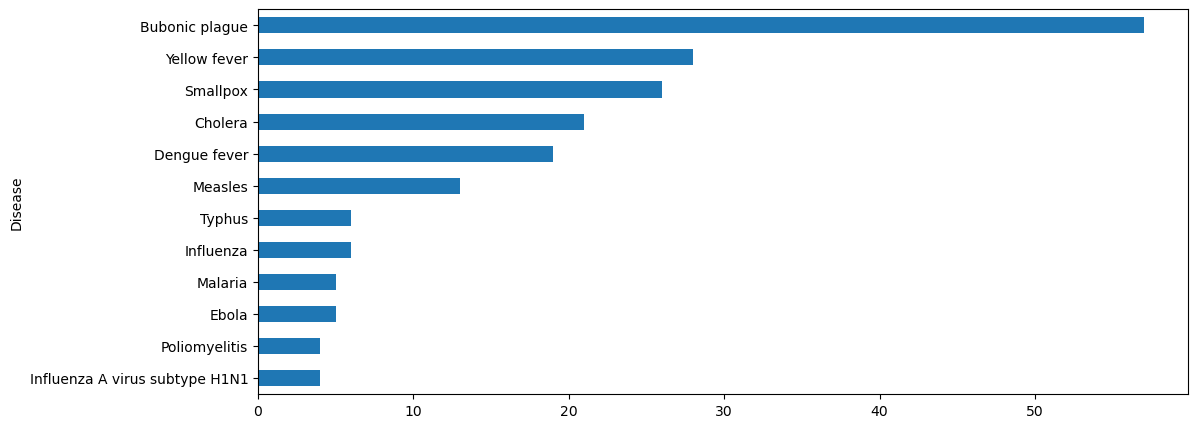

In [126]:
df.groupby('Disease').count()['Epidemics/pandemics'].sort_values(ascending = False).head(12).sort_values().plot(kind = 'barh', figsize=(12, 5))
plt.savefig('top_diseases_plot.eps', format='eps')

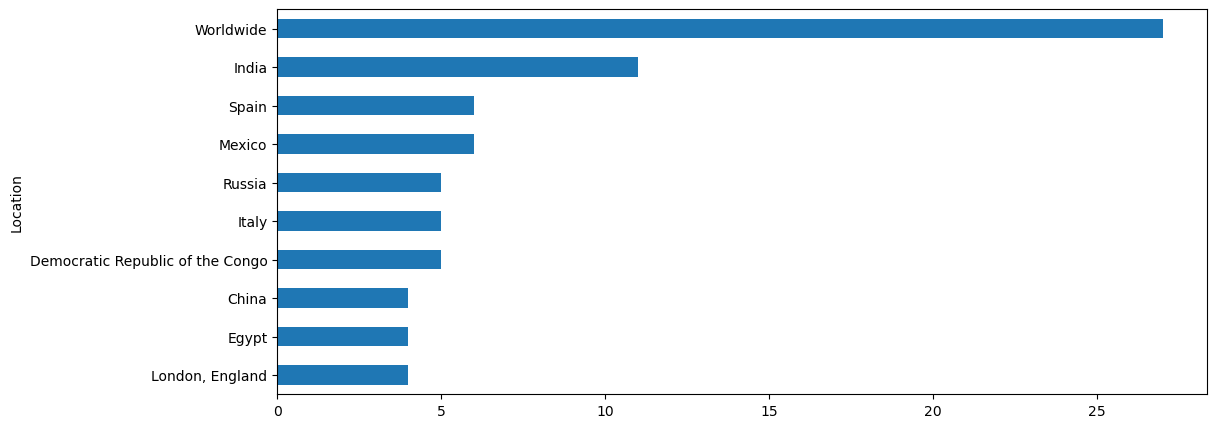

In [127]:
df.groupby('Location').count()['Epidemics/pandemics'].sort_values(ascending = False).head(10).sort_values().plot(kind = 'barh', figsize=(12, 5))
plt.savefig('top_locations_plot.eps', format='eps')

In [128]:
# Assuming your DataFrame is named 'df_worldwide'
# Convert 'Start Date' and 'End Date' to datetime format if they are not already
worldwide_data['Start Date'] = pd.to_datetime(worldwide_data['Start Date'])
worldwide_data['End Date'] = pd.to_datetime(worldwide_data['End Date'])

# Create a new column 'Plague_Length' in years
worldwide_data['Plague_Length'] = (worldwide_data['End Date'] - worldwide_data['Start Date']).dt.days / 365.25

# Display the updated DataFrame
print(worldwide_data[['Disease', 'Start Date', 'End Date', 'Plague_Length']])


                                               Disease Start Date   End Date  \
1                                     Influenza A/H1N1 1918-01-01 1920-01-01   
3                                             HIV/AIDS 1981-01-01 2023-01-01   
4                                             COVID-19 2019-01-01 2023-01-01   
5                                       Bubonic plague 1855-01-01 1960-01-01   
10                                    Influenza A/H2N2 1957-01-01 1958-01-01   
11                                    Influenza A/H3N2 1968-01-01 1969-01-01   
16                                             Cholera 1846-01-01 1860-01-01   
120                                          Influenza 1847-01-01 1848-01-01   
123                                            Cholera 1846-01-01 1860-01-01   
128                                     Bubonic plague 1855-01-01 1960-01-01   
146  Influenza or Human coronavirus OC43 / HCoV-OC4... 1889-01-01 1890-01-01   
159                            Encephali

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [129]:
## exploring the location column
df['Location'].value_counts()

Worldwide                                                                            27
India                                                                                11
Spain                                                                                 6
Mexico                                                                                6
Italy                                                                                 5
                                                                                     ..
Native populations in what is now the Pacific Northwest of the United States          1
Pueblo Indians in northern New Spain (what is now the Southwestern United States)     1
Philadelphia, United States                                                           1
Ottoman Empire, Egypt                                                                 1
Asia-Pacific, Latin America                                                           1
Name: Location, Length: 167, dty

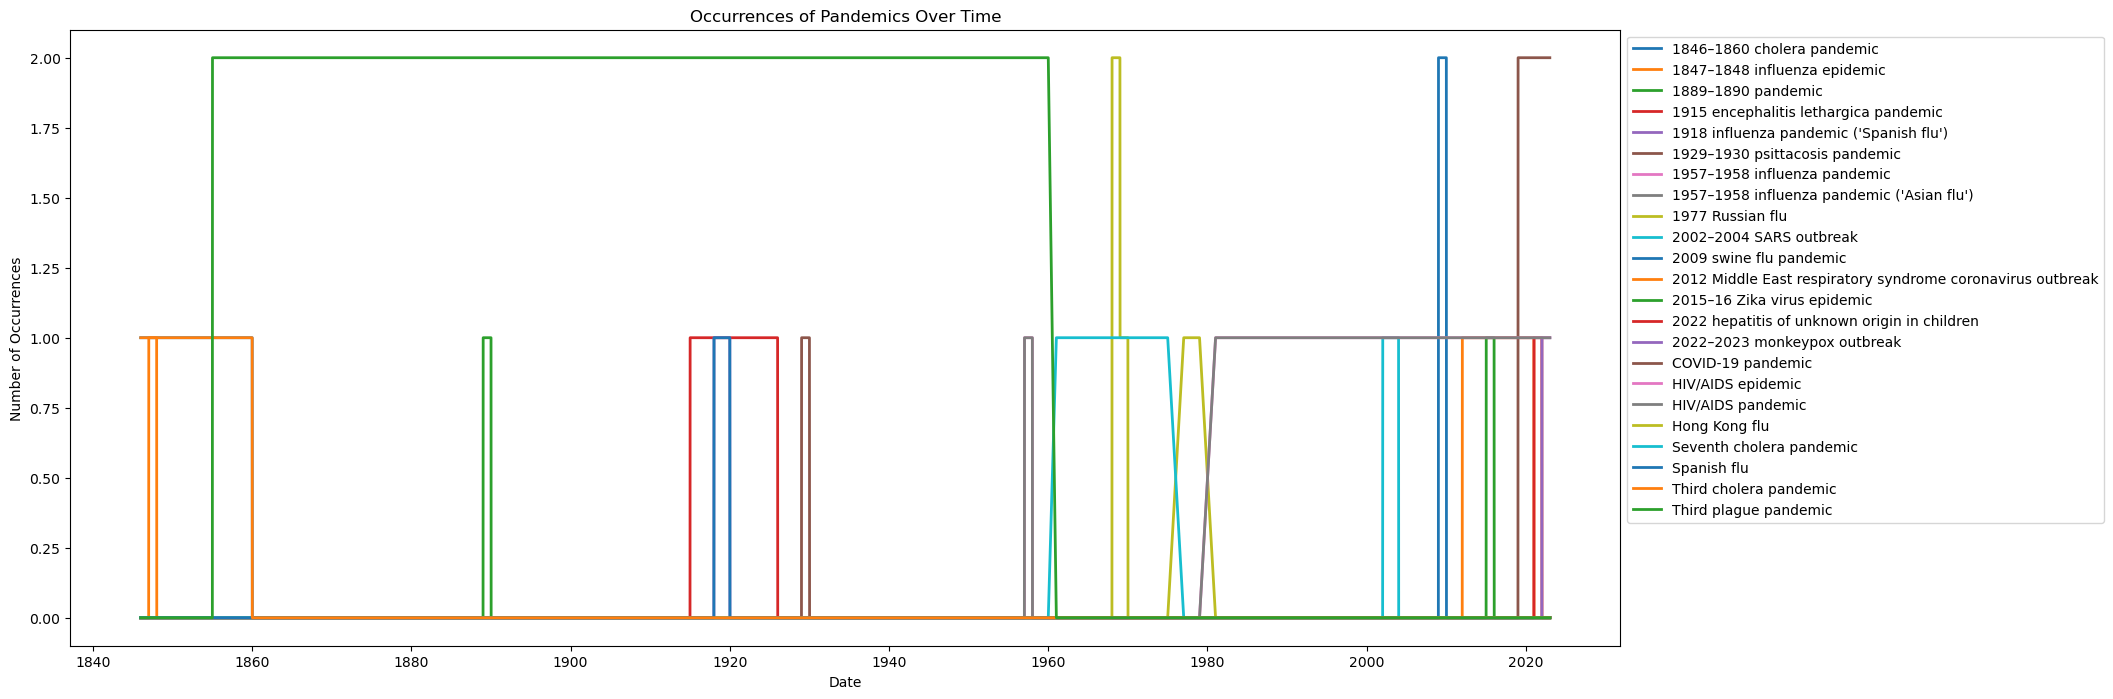

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' with columns 'Start Date', 'End Date', 'Epidemics/pandemics', and other relevant columns
# Make sure to preprocess the data accordingly

# Filter only rows where 'Location' is 'Worldwide'
df_worldwide = df[df['Location'] == 'Worldwide'].copy()

# Convert 'Start Date' and 'End Date' to datetime format
df_worldwide['Start Date'] = pd.to_datetime(df_worldwide['Start Date'], errors='coerce')
df_worldwide['End Date'] = pd.to_datetime(df_worldwide['End Date'], errors='coerce')

# Create a new DataFrame representing the start and end dates of each pandemic
pandemics_dates = pd.DataFrame(columns=['Date', 'Epidemics/pandemics'])

for _, row in df_worldwide.iterrows():
    start_date = row['Start Date']
    end_date = row['End Date']
    pandemic_name = row['Epidemics/pandemics']
    
    # Generate a date range between start and end dates
    date_range = pd.date_range(start_date, end_date, freq='D')
    
    # Append to the new DataFrame
    pandemics_dates = pd.concat([pandemics_dates, pd.DataFrame({'Date': date_range, 'Epidemics/pandemics': pandemic_name})])

# Group by 'Date' and 'Epidemics/pandemics' and count occurrences
pandemics_occurrences = pandemics_dates.groupby(['Date', 'Epidemics/pandemics']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(20, 8))  # Increased figure width

for pandemic in pandemics_occurrences.columns:
    plt.plot(pandemics_occurrences.index, pandemics_occurrences[pandemic], label=pandemic, linewidth=2)

plt.title('Occurrences of Pandemics Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Save the plot as an EPS file
plt.savefig('pandemics_occurrences_plot.eps', format='eps')

plt.show()


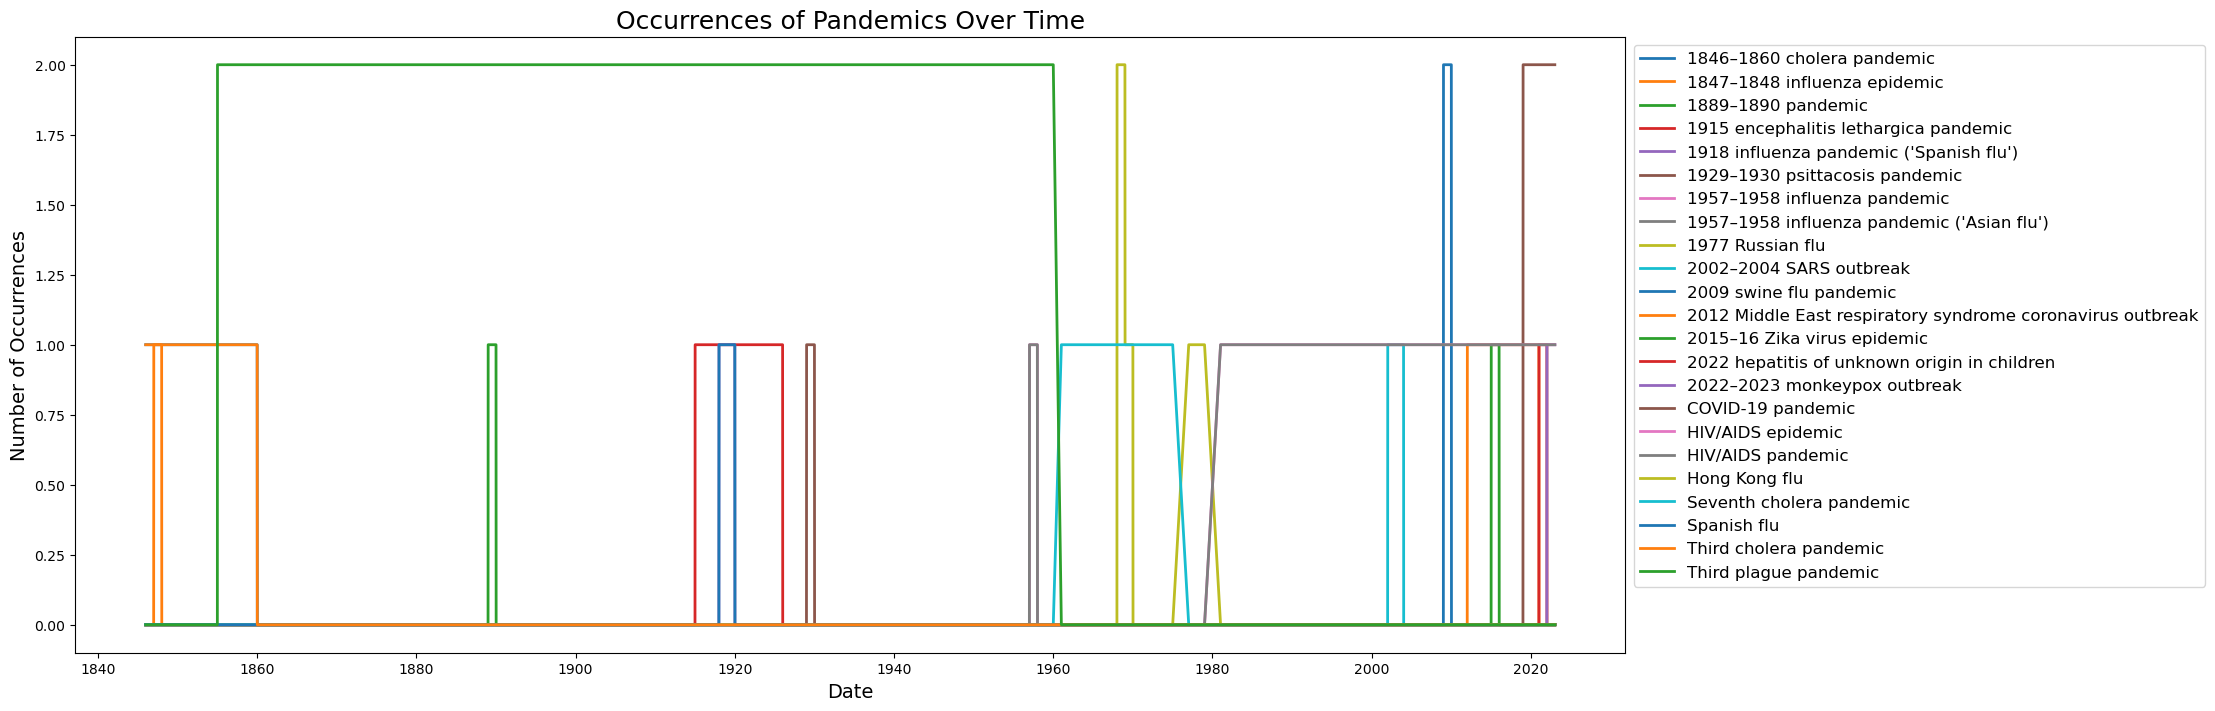

In [131]:
# Plotting
plt.figure(figsize=(20, 8))  # Increased figure width

for pandemic in pandemics_occurrences.columns:
    plt.plot(pandemics_occurrences.index, pandemics_occurrences[pandemic], label=pandemic, linewidth=2)

plt.title('Occurrences of Pandemics Over Time', fontsize=18)  # Increased font size for title
plt.xlabel('Date', fontsize=14)  # Increased font size for x-axis label
plt.ylabel('Number of Occurrences', fontsize=14)  # Increased font size for y-axis label
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)  # Adjusted legend position and increased font size

# Save the plot as an EPS file
plt.savefig('pandemics_occurrences_plot.eps', format='eps', bbox_inches='tight')  # Use bbox_inches='tight' to prevent cropping

plt.show()


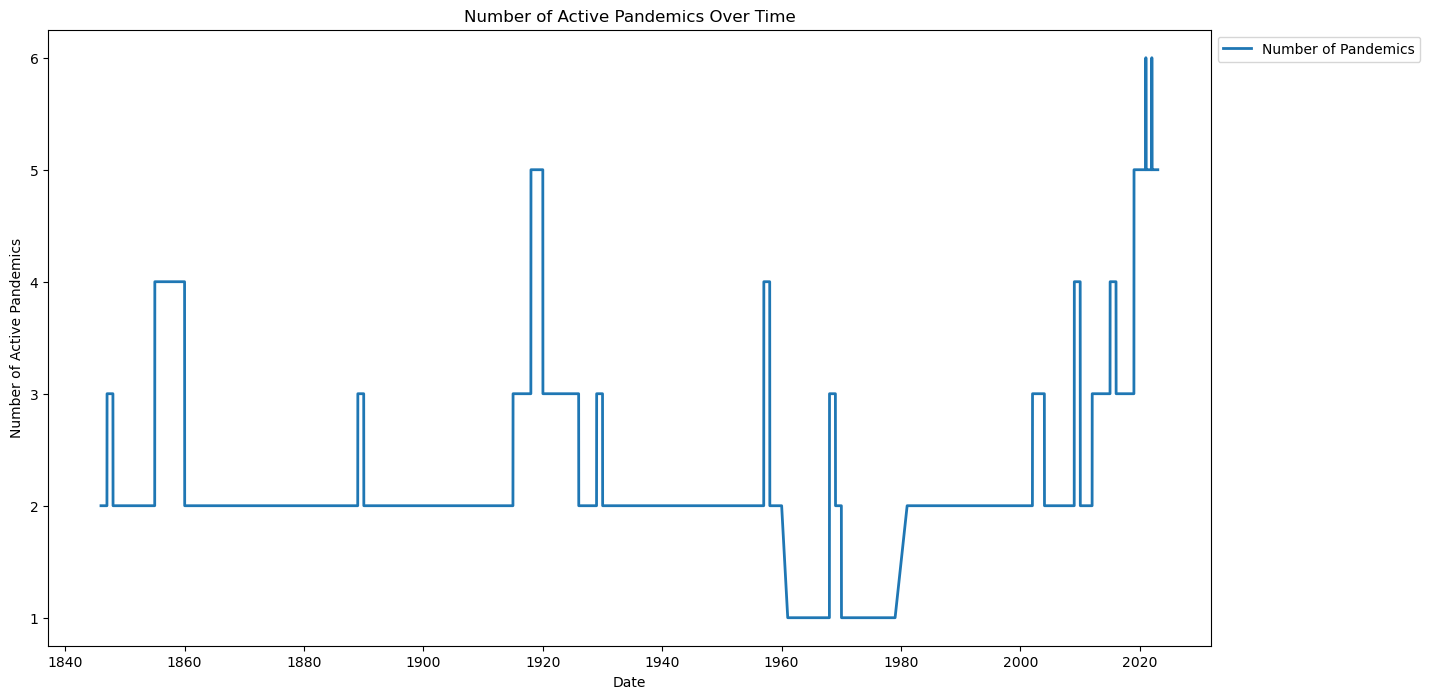

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' with columns 'Start Date', 'End Date', 'Epidemics/pandemics', and other relevant columns
# Make sure to preprocess the data accordingly

# Filter only rows where 'Location' is 'Worldwide'
df_worldwide = df[df['Location'] == 'Worldwide'].copy()

# Convert 'Start Date' and 'End Date' to datetime format
df_worldwide['Start Date'] = pd.to_datetime(df_worldwide['Start Date'], errors='coerce')
df_worldwide['End Date'] = pd.to_datetime(df_worldwide['End Date'], errors='coerce')

# Create a new DataFrame representing the start and end dates of each pandemic
pandemics_dates = pd.DataFrame(columns=['Date', 'Epidemics/pandemics'])

for _, row in df_worldwide.iterrows():
    start_date = row['Start Date']
    end_date = row['End Date']
    pandemic_name = row['Epidemics/pandemics']
    
    # Generate a date range between start and end dates
    date_range = pd.date_range(start_date, end_date, freq='D')
    
    # Append to the new DataFrame
    pandemics_dates = pd.concat([pandemics_dates, pd.DataFrame({'Date': date_range, 'Epidemics/pandemics': pandemic_name})])

# Count the number of pandemics active on each day
pandemics_count_by_date = pandemics_dates.groupby(['Date']).size()

# Plotting
plt.figure(figsize=(15, 8))

plt.plot(pandemics_count_by_date.index, pandemics_count_by_date, label='Number of Pandemics', linewidth=2)

plt.title('Number of Active Pandemics Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Active Pandemics')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Save the plot as an EPS file
plt.savefig('pandemics_number.eps', format='eps')
plt.show()


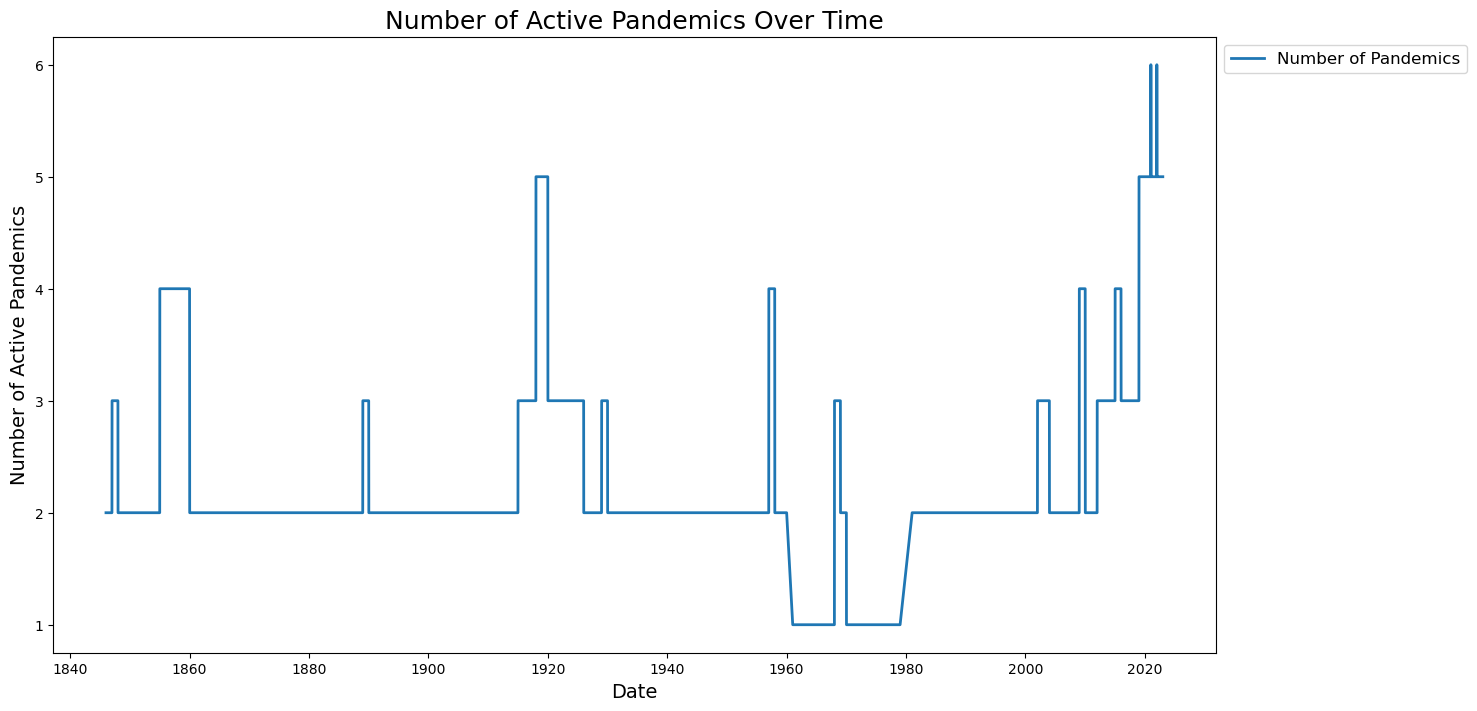

In [133]:
# Plotting
plt.figure(figsize=(15, 8))  # Increased figure size

plt.plot(pandemics_count_by_date.index, pandemics_count_by_date, label='Number of Pandemics', linewidth=2)

plt.title('Number of Active Pandemics Over Time', fontsize=18)  # Increased font size for title
plt.xlabel('Date', fontsize=14)  # Increased font size for x-axis label
plt.ylabel('Number of Active Pandemics', fontsize=14)  # Increased font size for y-axis label
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)  # Adjusted legend position and increased font size

# Save the plot as an EPS file
plt.savefig('pandemics_number.eps', format='eps', bbox_inches='tight')  # Use bbox_inches='tight' to prevent cropping
plt.show()


In [134]:
import pandas as pd

# Assuming your DataFrame is named 'df' with columns 'Start Date', 'End Date', 'Epidemics/pandemics', and other relevant columns
# Make sure to preprocess the data accordingly

# Convert 'Start Date' and 'End Date' to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['End Date'] = pd.to_datetime(df['End Date'], errors='coerce')

# Filter pandemics that occurred in 2020
pandemics_2020 = df[(df['Start Date'].dt.year == 2020) | (df['End Date'].dt.year == 2020)]

# Display the relevant information
print(pandemics_2020[['Epidemics/pandemics', 'Start Date', 'End Date']])


                                   Epidemics/pandemics Start Date   End Date
255                                Kivu Ebola epidemic 2018-01-01 2020-01-01
257  2019–2020 measles outbreak in the Democratic R... 2019-01-01 2020-01-01
258             2019–2020 New Zealand measles outbreak 2019-01-01 2020-01-01
262                    2019–2020 dengue fever epidemic 2019-01-01 2020-01-01
265  2020 Democratic Republic of the Congo Ebola ou... 2020-01-01        NaT
266                  2020 dengue outbreak in Singapore 2020-01-01        NaT
267                 2020 Nigeria yellow fever epidemic 2020-01-01        NaT


           Date  Predicted Pandemics
0    2023-01-01                    3
1    2023-01-02                    3
2    2023-01-03                    3
3    2023-01-04                    2
4    2023-01-05                    3
...         ...                  ...
9858 2049-12-28                    3
9859 2049-12-29                    3
9860 2049-12-30                    3
9861 2049-12-31                    3
9862 2050-01-01                    3

[9863 rows x 2 columns]


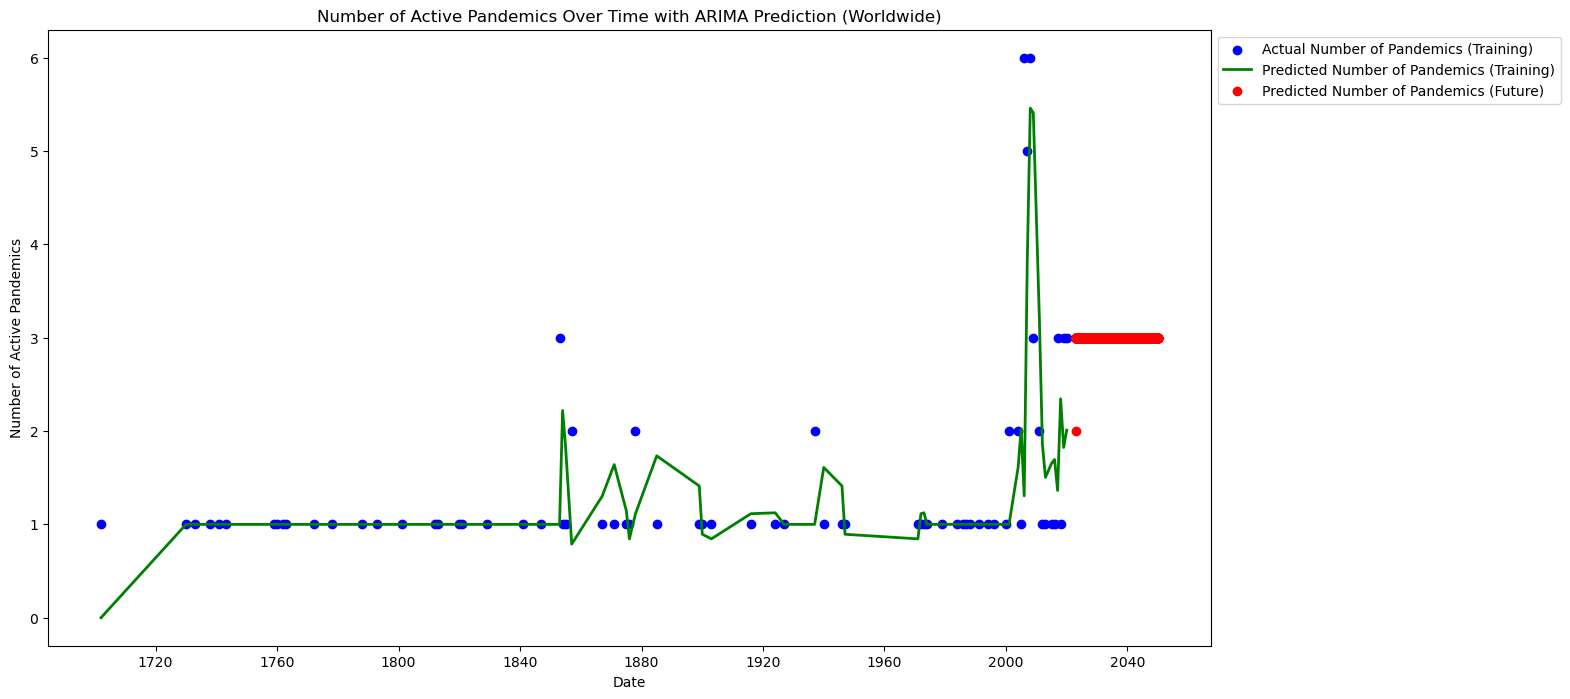

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming your DataFrame is named 'df' with columns 'Date', 'Location', and 'Number of Pandemics'
# Make sure to preprocess the data accordingly

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter data from 1700 to 2023
train_data = df[(df['Date'] >= '1700-01-01') & (df['Date'] <= '2022-12-31')]

# Count the number of pandemics active on each day for training
train_pandemics_count = train_data.groupby(['Date']).size().reset_index(name='Number of Pandemics')

# Separate the training data into features (X) and target variable (y)
X_train = pd.to_numeric(train_pandemics_count['Date']).values.reshape(-1, 1)
y_train = train_pandemics_count['Number of Pandemics'].values

# Train an ARIMA model on the training data
model = ARIMA(y_train, order=(5, 1, 0))  # Adjust order as needed
fit_model = model.fit()

# Make predictions for the future (2023 to 2050)
prediction_start_date = pd.to_datetime('2023-01-01')
prediction_end_date = pd.to_datetime('2050-01-01')
prediction_dates = pd.date_range(start=prediction_start_date, end=prediction_end_date, freq='D')
predicted_pandemics = fit_model.predict(start=len(y_train), end=len(y_train) + len(prediction_dates) - 1, typ='levels')

# Round the predicted values to the nearest integer
predicted_pandemics = predicted_pandemics.round().astype(int)

# Display dates and predicted number of pandemics for future years where count is greater than zero
future_pandemics = pd.DataFrame({'Date': prediction_dates, 'Predicted Pandemics': predicted_pandemics})
future_pandemics = future_pandemics[future_pandemics['Predicted Pandemics'] > 0]
print(future_pandemics)

# Filter only rows where 'Location' is 'Worldwide'
df_worldwide = df[df['Location'] == 'Worldwide'].copy()

# Plotting with resized figure
plt.figure(figsize=(15, 8))

# Plot the historical data
plt.scatter(train_pandemics_count['Date'], y_train, label='Actual Number of Pandemics (Training)', color='blue')

# Plot the ARIMA predictions for the training data
plt.plot(train_pandemics_count['Date'], fit_model.predict(start=0, end=len(y_train) - 1, typ='levels'),
         label='Predicted Number of Pandemics (Training)', color='green', linewidth=2)

# Plot the ARIMA predictions for the future
plt.scatter(future_pandemics['Date'], future_pandemics['Predicted Pandemics'],
            label='Predicted Number of Pandemics (Future)', color='red')

# Show the plot
plt.title('Number of Active Pandemics Over Time with ARIMA Prediction (Worldwide)')
plt.xlabel('Date')
plt.ylabel('Number of Active Pandemics')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Save the plot as EPS
plt.savefig('pandemics_prediction_plot.eps', format='eps', bbox_inches='tight')

plt.show()


In [136]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


In [137]:
pip install pandas matplotlib numpy scikit-learn tensorflow


Note: you may need to restart the kernel to use updated packages.


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


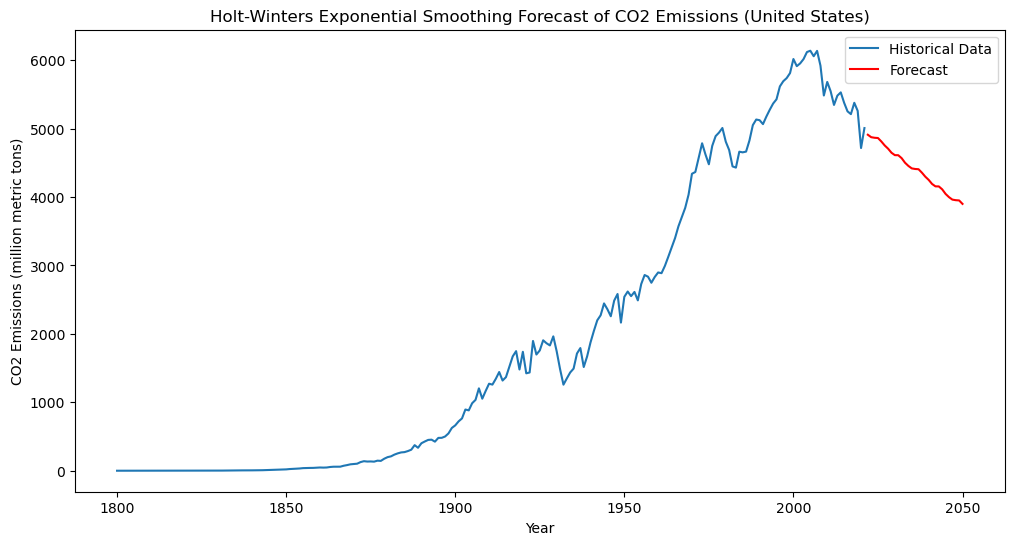

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the CO2 emissions data
co2_data = pd.read_csv("/kaggle/input/2022-complete-co2-emissions/owid-co2-data.csv")
co2_data.set_index('year', inplace=True)

# Choose a specific country (replace 'United States' with your desired country)
selected_country = 'United States'
co2_data = co2_data[co2_data['country'] == selected_country]

# Select only numeric columns for time series analysis
numeric_columns = co2_data.select_dtypes(include='number')

# Check if the index is monotonic, otherwise sort it
if not co2_data.index.is_monotonic:
    co2_data = co2_data.sort_index()

# Fit the Holt-Winters Exponential Smoothing model
model = ExponentialSmoothing(numeric_columns['co2'], trend="add", seasonal="add", seasonal_periods=12)
fit_model = model.fit()

# Forecast CO2 emissions for the future (2021 to 2040)
forecast_years = 2050 - co2_data.index.max()
co2_forecast = fit_model.forecast(steps=forecast_years)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(co2_data.index, co2_data['co2'], label='Historical Data')
plt.plot(range(co2_data.index.max() + 1, 2051), co2_forecast, label='Forecast', color='red')
plt.title(f'Holt-Winters Exponential Smoothing Forecast of CO2 Emissions ({selected_country})')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (million metric tons)')
plt.legend()
plt.show()


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


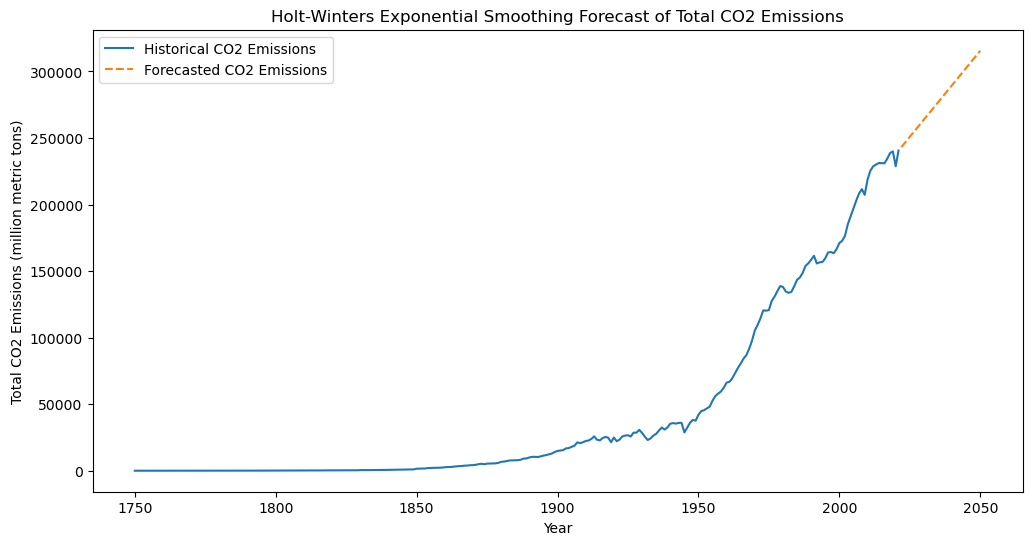

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the CO2 emissions data
co2_data = pd.read_csv("/kaggle/input/2022-complete-co2-emissions/owid-co2-data.csv")
co2_data.set_index('year', inplace=True)

# Select only numeric columns for time series analysis
numeric_columns = co2_data.select_dtypes(include='number')

# Check if the index is monotonic, otherwise sort it
if not co2_data.index.is_monotonic:
    co2_data = co2_data.sort_index()

# Group by year and sum the CO2 emissions for all countries
total_co2_data = co2_data.groupby('year')['co2'].sum()

# Reset the index to resolve the warning
total_co2_data = total_co2_data.reset_index()

# Fit the Holt-Winters Exponential Smoothing model
model = ExponentialSmoothing(total_co2_data['co2'], trend="add", seasonal="add", seasonal_periods=12)
fit_model = model.fit()

# Forecast CO2 emissions for the future years
forecast_years = 2050 - total_co2_data['year'].max()
co2_forecast = fit_model.forecast(steps=forecast_years)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(total_co2_data['year'], total_co2_data['co2'], label='Historical CO2 Emissions')
plt.plot(range(total_co2_data['year'].max() + 1, 2051), co2_forecast, label='Forecasted CO2 Emissions', linestyle='dashed')
plt.title('Holt-Winters Exponential Smoothing Forecast of Total CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (million metric tons)')
plt.legend()
plt.show()


In [140]:
co2_data.head()

,country,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
year,,,,,,,,,,,,,,,,,,,,,
1750,Europe (excl. EU-27),NaN,NaN,NaN,0.0,0.0,9.351,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1750,French Guiana,GUF,3097.0,NaN,0.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1750,Guadeloupe,GLP,84790.0,NaN,0.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1750,Guinea,GIN,1230694.0,NaN,0.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1750,High-income countries,NaN,160098181.0,NaN,0.0,0.0,9.351,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
co2_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46523 entries, 1750 to 2021
Data columns (total 73 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    46523 non-null  object 
 1   iso_code                                   39862 non-null  object 
 2   population                                 38574 non-null  float64
 3   gdp                                        14551 non-null  float64
 4   cement_co2                                 24974 non-null  float64
 5   cement_co2_per_capita                      22714 non-null  float64
 6   co2                                        31349 non-null  float64
 7   co2_growth_abs                             28944 non-null  float64
 8   co2_growth_prct                            25032 non-null  float64
 9   co2_including_luc                          24212 non-null  float64
 10  co2_including_luc_gr

In [142]:
# Check for missing values in the "co2" column
missing_values_co2 = co2_data['co2'].isnull().sum()

print("Number of missing values in the 'co2' column:", missing_values_co2)

Number of missing values in the 'co2' column: 15174


In [143]:
pip install pystan==2.19.1.1


Note: you may need to restart the kernel to use updated packages.


In [144]:
df.head()

,Epidemics/pandemics,Disease,Death toll,Date,Location,Start Date,End Date
0,Black Death,Bubonic plague,137.500000,NaT,"Europe, Asia, and North Africa",NaT,NaT
1,Spanish flu,Influenza A/H1N1,58.500000,NaT,Worldwide,1918-01-01,1920-01-01
2,Plague of Justinian,Bubonic plague,57.500000,NaT,"North Africa, Europe and Western Asia",NaT,NaT
3,HIV/AIDS epidemic,HIV/AIDS,1030.550000,NaT,Worldwide,1981-01-01,2023-01-01
4,COVID-19 pandemic,COVID-19,685.766667,NaT,Worldwide,2019-01-01,2023-01-01


In [145]:
df_worldwide.head()

,Epidemics/pandemics,Disease,Death toll,Date,Location,Start Date,End Date
1,Spanish flu,Influenza A/H1N1,58.500000,NaT,Worldwide,1918-01-01,1920-01-01
3,HIV/AIDS epidemic,HIV/AIDS,1030.550000,NaT,Worldwide,1981-01-01,2023-01-01
4,COVID-19 pandemic,COVID-19,685.766667,NaT,Worldwide,2019-01-01,2023-01-01
5,Third plague pandemic,Bubonic plague,13.500000,NaT,Worldwide,1855-01-01,1960-01-01
10,1957–1958 influenza pandemic,Influenza A/H2N2,2.500000,NaT,Worldwide,1957-01-01,1958-01-01


In [146]:
# Load CO2 emissions data
co2_data = pd.read_csv("/kaggle/input/2022-complete-co2-emissions/owid-co2-data.csv")

In [147]:
total_co2_data['year'].max()

2021

In [148]:
df_worldwide['Start Date'].max()

Timestamp('2022-01-01 00:00:00')

In [149]:
# Convert 'Start Date' and 'End Date' columns to datetime format
df_worldwide['Start Date'] = pd.to_datetime(df_worldwide['Start Date'], errors='coerce')
df_worldwide['End Date'] = pd.to_datetime(df_worldwide['End Date'], errors='coerce')



In [150]:
print(df_worldwide[['Start Date', 'End Date']].head())
print(total_co2_data.head())


   Start Date   End Date
1  1918-01-01 1920-01-01
3  1981-01-01 2023-01-01
4  2019-01-01 2023-01-01
5  1855-01-01 1960-01-01
10 1957-01-01 1958-01-01
   year     co2
0  1750  56.106
1  1751  56.106
2  1752  56.124
3  1753  56.124
4  1754  56.148


In [151]:

print(df_worldwide['Start Date'].unique())


['1918-01-01T00:00:00.000000000' '1981-01-01T00:00:00.000000000'
 '2019-01-01T00:00:00.000000000' '1855-01-01T00:00:00.000000000'
 '1957-01-01T00:00:00.000000000' '1968-01-01T00:00:00.000000000'
 '1846-01-01T00:00:00.000000000' '1847-01-01T00:00:00.000000000'
 '1889-01-01T00:00:00.000000000' '1915-01-01T00:00:00.000000000'
 '1929-01-01T00:00:00.000000000' '1961-01-01T00:00:00.000000000'
 '1977-01-01T00:00:00.000000000' '2002-01-01T00:00:00.000000000'
 '2009-01-01T00:00:00.000000000' '2012-01-01T00:00:00.000000000'
 '2015-01-01T00:00:00.000000000' '2021-01-01T00:00:00.000000000'
 '2022-01-01T00:00:00.000000000']


In [152]:
# Create a copy of the CO2 dataset
co2_data_copy = co2_data.copy()

# Initialize the 'Pandemics Flag' column with zeros
co2_data_copy['Pandemics Flag'] = 0

# Iterate through the pandemics and set 'Pandemics Flag' to 1 for the corresponding years
for index, row in df_worldwide.iterrows():
    start_year = row['Start Date'].year
    co2_data_copy.loc[start_year, 'Pandemics Flag'] = 1

# Print the modified CO2 dataset
print(co2_data_copy)


           country  year iso_code  population           gdp  cement_co2  \
0      Afghanistan  1850      AFG   3752993.0           NaN         NaN   
1      Afghanistan  1851      AFG   3769828.0           NaN         NaN   
2      Afghanistan  1852      AFG   3787706.0           NaN         NaN   
3      Afghanistan  1853      AFG   3806634.0           NaN         NaN   
4      Afghanistan  1854      AFG   3825655.0           NaN         NaN   
...            ...   ...      ...         ...           ...         ...   
46518     Zimbabwe  2017      ZWE  14751101.0  2.194784e+10       0.469   
46519     Zimbabwe  2018      ZWE  15052191.0  2.271535e+10       0.558   
46520     Zimbabwe  2019      ZWE  15354606.0           NaN       0.570   
46521     Zimbabwe  2020      ZWE  15669663.0           NaN       0.570   
46522     Zimbabwe  2021      ZWE  15993525.0           NaN       0.570   

       cement_co2_per_capita     co2  co2_growth_abs  co2_growth_prct  ...  \
0                    

In [153]:
# Assuming co2_data_copy is your DataFrame
pandemics_flag_1_rows = co2_data_copy[co2_data_copy['Pandemics Flag'] == 0]

# Display the rows where Pandemics Flag is 1
print(pandemics_flag_1_rows)


           country  year iso_code  population           gdp  cement_co2  \
0      Afghanistan  1850      AFG   3752993.0           NaN         NaN   
1      Afghanistan  1851      AFG   3769828.0           NaN         NaN   
2      Afghanistan  1852      AFG   3787706.0           NaN         NaN   
3      Afghanistan  1853      AFG   3806634.0           NaN         NaN   
4      Afghanistan  1854      AFG   3825655.0           NaN         NaN   
...            ...   ...      ...         ...           ...         ...   
46518     Zimbabwe  2017      ZWE  14751101.0  2.194784e+10       0.469   
46519     Zimbabwe  2018      ZWE  15052191.0  2.271535e+10       0.558   
46520     Zimbabwe  2019      ZWE  15354606.0           NaN       0.570   
46521     Zimbabwe  2020      ZWE  15669663.0           NaN       0.570   
46522     Zimbabwe  2021      ZWE  15993525.0           NaN       0.570   

       cement_co2_per_capita     co2  co2_growth_abs  co2_growth_prct  ...  \
0                    

In [154]:
# Replace 0.0 with 0 and 1.0 with 1 in the 'Pandemics Flag' column
co2_data_copy['Pandemics Flag'] = co2_data_copy['Pandemics Flag'].astype(int)

# Now 'Pandemics Flag' column will have values as 0 or 1


In [155]:
pandemics_exist_data = co2_data_copy[co2_data_copy['Pandemics Flag'] == 1]
print(pandemics_exist_data)

                  country  year iso_code  population  gdp  cement_co2  \
1846             Anguilla  1948      AIA         NaN  NaN         NaN   
1847             Anguilla  1949      AIA         NaN  NaN         NaN   
1855             Anguilla  1957      AIA      5815.0  NaN         NaN   
1889             Anguilla  1991      AIA      8638.0  NaN         0.0   
1915             Anguilla  2017      AIA     15040.0  NaN         0.0   
1918             Anguilla  2020      AIA     15612.0  NaN         0.0   
1929           Antarctica  1996      ATA         NaN  NaN         0.0   
1957  Antigua and Barbuda  1866      ATG     35686.0  NaN         NaN   
1961  Antigua and Barbuda  1870      ATG     34993.0  NaN         NaN   
1968  Antigua and Barbuda  1877      ATG     34832.0  NaN         NaN   
1977  Antigua and Barbuda  1886      ATG     35957.0  NaN         NaN   
1981  Antigua and Barbuda  1890      ATG     36493.0  NaN         NaN   
2002  Antigua and Barbuda  1911      ATG     31467.

In [156]:
co2_data_2022 = pd.read_csv("/kaggle/input/2022-complete-co2-emissions/owid-co2-data.csv")

In [157]:
co2_data_2022.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
co2_data_2022['year'] = pd.to_datetime(co2_data_2022['year'], format='%Y')
# Create a new column with the same values as the 'year' column
co2_data_2022['year_copy'] = co2_data_2022['year']

# Set the 'year_copy' column as the index
co2_data_2022.set_index('year_copy', inplace=True)
#df.set_index('year', inplace=True)

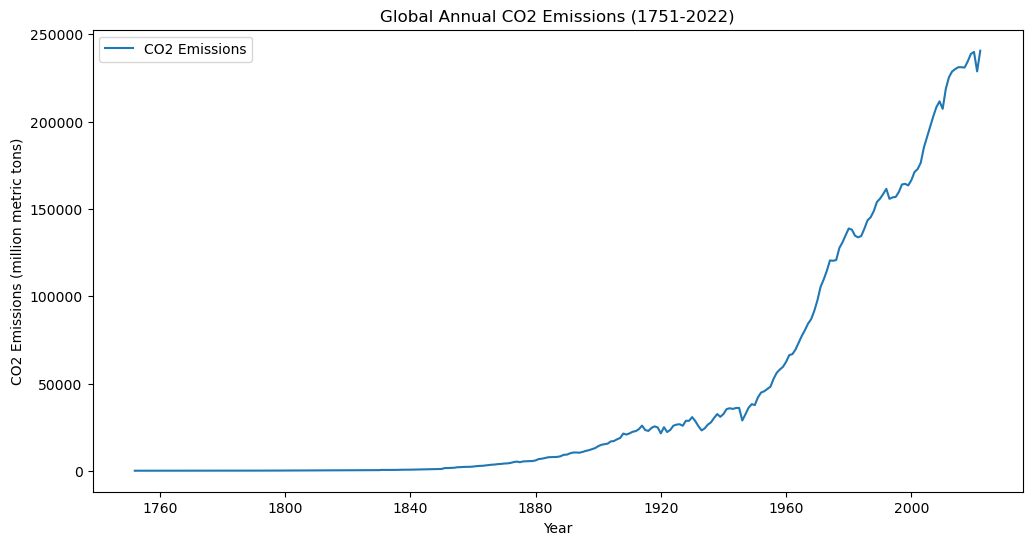

In [159]:

start_date = pd.to_datetime('1751', format='%Y')
end_date = pd.to_datetime('2022', format='%Y')
co2_data = co2_data_2022.loc[(co2_data_2022.index >= start_date) & (co2_data_2022.index <= end_date), 'co2']
co2_data =co2_data.groupby(pd.Grouper(freq='Y')).sum()
plt.figure(figsize=(12, 6))
plt.plot(co2_data.index, co2_data, label='CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (million metric tons)')
plt.title('Global Annual CO2 Emissions (1751-2022)')
plt.legend()
plt.savefig('Global_Annual_CO2_Emissions.eps', format='eps', bbox_inches='tight')
plt.show()

In [160]:
print(co2_data_copy[co2_data_copy['Pandemics Flag'] == 1])


                  country  year iso_code  population  gdp  cement_co2  \
1846             Anguilla  1948      AIA         NaN  NaN         NaN   
1847             Anguilla  1949      AIA         NaN  NaN         NaN   
1855             Anguilla  1957      AIA      5815.0  NaN         NaN   
1889             Anguilla  1991      AIA      8638.0  NaN         0.0   
1915             Anguilla  2017      AIA     15040.0  NaN         0.0   
1918             Anguilla  2020      AIA     15612.0  NaN         0.0   
1929           Antarctica  1996      ATA         NaN  NaN         0.0   
1957  Antigua and Barbuda  1866      ATG     35686.0  NaN         NaN   
1961  Antigua and Barbuda  1870      ATG     34993.0  NaN         NaN   
1968  Antigua and Barbuda  1877      ATG     34832.0  NaN         NaN   
1977  Antigua and Barbuda  1886      ATG     35957.0  NaN         NaN   
1981  Antigua and Barbuda  1890      ATG     36493.0  NaN         NaN   
2002  Antigua and Barbuda  1911      ATG     31467.

In [161]:
import pandas as pd

# Assuming your dataset is in a DataFrame named 'co2_data_copy' with columns 'Country', 'Year', 'Pandemic_Flag'

# Group by 'Country' and 'Year' and aggregate 'Pandemic_Flag' as 'Any_Pandemic'
df_grouped = co2_data_copy.groupby(['country', 'year'])['Pandemics Flag'].any().reset_index()

# Filter rows where 'Any_Pandemic' is True
pandemic_years = df_grouped[df_grouped['Pandemics Flag']]

# Now, 'pandemic_years' contains unique years for each country when pandemics happened
print(pandemic_years)


                  country  year  Pandemics Flag
1846             Anguilla  1948            True
1847             Anguilla  1949            True
1855             Anguilla  1957            True
1889             Anguilla  1991            True
1915             Anguilla  2017            True
1918             Anguilla  2020            True
1929           Antarctica  1996            True
1957  Antigua and Barbuda  1866            True
1961  Antigua and Barbuda  1870            True
1968  Antigua and Barbuda  1877            True
1977  Antigua and Barbuda  1886            True
1981  Antigua and Barbuda  1890            True
2002  Antigua and Barbuda  1911            True
2009  Antigua and Barbuda  1918            True
2012  Antigua and Barbuda  1921            True
2015  Antigua and Barbuda  1924            True
2019  Antigua and Barbuda  1928            True
2021  Antigua and Barbuda  1930            True
2022  Antigua and Barbuda  1931            True


In [162]:
date_periods = (
    list(range(1855, 1960)) +
    list(range(1968, 1970)) +
    list(range(1846, 1861)) +
    list(range(1847, 1849)) +
    list(range(1915, 1927)) +
    list(range(1918, 1921)) +
    list(range(1929, 1931)) +
    list(range(1957, 1959)) +
    list(range(1961, 1976)) +
    list(range(1968, 1971)) +
    list(range(1977, 1980)) +
    list(range(1981, 2023)) +  # Assuming the current year is 2022
    list(range(2002, 2005)) +
    list(range(2009, 2011)) +
    list(range(2012, 2022)) +
    list(range(2015, 2017)) +
    list(range(2019, 2023)) +
    list(range(2021, 2023)) +
    list(range(2022, 2023))  # For the ongoing period
)

print(date_periods)


[1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1968, 1969, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1847, 1848, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1918, 1919, 1920, 1929, 1930, 1957, 1958, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1968, 1969, 1970, 1977, 1978, 1979, 1981, 1982, 198

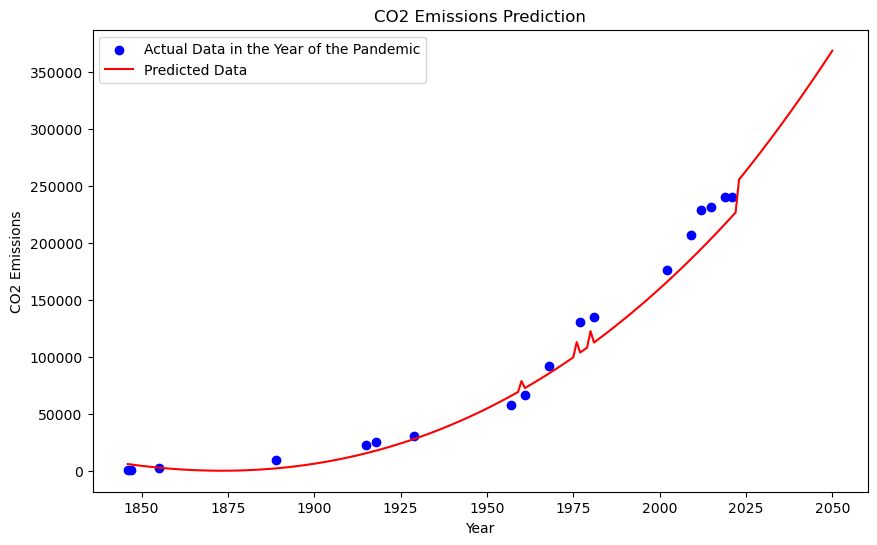

R-squared: 0.994794045410847


In [163]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Assuming you have a DataFrame named co2_data_copy with columns 'year' and 'co2'
# Load your data (replace 'your_data.csv' with the actual file name or provide your DataFrame)
# co2_data_copy = pd.read_csv('your_data.csv')

# Group data by year and sum the CO2 emissions
co2_data = co2_data_copy.groupby('year')['co2'].sum().reset_index()

# Filter data for the provided years
selected_years = [1846, 1847, 1855, 1889, 1915, 1918, 1929, 1957, 1961, 1968, 1977, 1981, 2002, 2009, 2012, 2015, 2019, 2021]
# selected_years = [1848, 1860, 1890, 1926, 1930, 1958, 1960, 1969, 1970, 1975, 1979, 2004, 2010, 2016, 2021, 2022, 2023]

# Convert 'year' column to integers
co2_data['year'] = co2_data['year'].astype(int)

selected_data = co2_data[co2_data['year'].isin(selected_years)]

# Separate features (X) and target variable (y)
X = selected_data[['year']]
y = selected_data['co2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create a linear regression model
model = make_pipeline(PolynomialFeatures(3), LinearRegression())

# Train the model
model.fit(X_train, y_train)

# Make predictions for the years up to 2050
future_years = list(range(1846, 2051))
future_data = pd.DataFrame({'year': future_years})

# Predict CO2 emissions
predicted_co2 = model.predict(future_data[['year']])

# Adjusting CO2 emissions after the starting year of a pandemic
for year in future_years:
    if year in date_periods:
        idx = future_years.index(year)
        predicted_co2[idx] *= 0.9  # Decrease CO2 emissions by 10%

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data in the Year of the Pandemic')
plt.plot(future_data['year'], predicted_co2, color='red', label='Predicted Data')
plt.title('CO2 Emissions Prediction')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()
# Calculate R-squared value for the model
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)


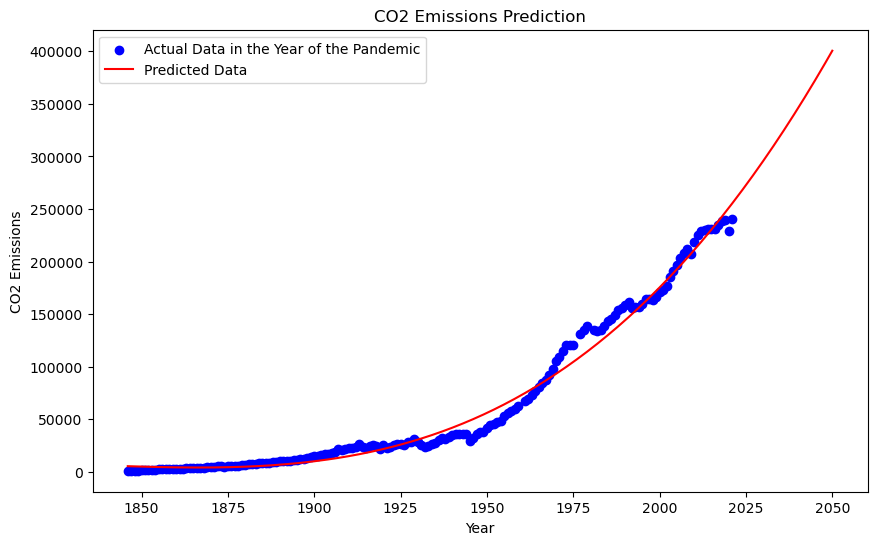

In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Assuming you have a DataFrame named co2_data_copy with columns 'year' and 'co2'
# Load your data (replace 'your_data.csv' with the actual file name or provide your DataFrame)
# co2_data_copy = pd.read_csv('your_data.csv')

# Group data by year and sum the CO2 emissions
co2_data = co2_data_copy.groupby('year')['co2'].sum().reset_index()

# Filter data for the provided years
selected_years = [1846, 1847, 1855, 1889, 1915, 1918, 1929, 1957, 1961, 1968, 1977, 1981, 2002, 2009, 2012, 2015, 2019, 2021]
#selected_years = [1848, 1860, 1890, 1926, 1930, 1958, 1960, 1969, 1970, 1975, 1979, 2004, 2010, 2016, 2021, 2022, 2023]

# Convert 'year' column to integers
co2_data['year'] = co2_data['year'].astype(int)

selected_data = co2_data[co2_data['year'].isin(date_periods)]

# Separate features (X) and target variable (y)
X = selected_data[['year']]
y = selected_data['co2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create a linear regression model
model = make_pipeline(PolynomialFeatures(3), LinearRegression())

# Train the model
model.fit(X_train, y_train)

# Make predictions for the years up to 2050
future_years = list(range(1846, 2051))
future_data = pd.DataFrame({'year': future_years})

# Predict CO2 emissions
future_data['Predicted_CO2_emissions'] = model.predict(future_data[['year']])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data in the Year of the Pandemic')
plt.plot(future_data['year'], future_data['Predicted_CO2_emissions'], color='red', label='Predicted Data')
plt.title('CO2 Emissions Prediction')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()


In [165]:
# Print columns of co2_data_copy
print(co2_data_copy.index.name)  # This will print the index name
print(co2_data_copy.columns)  # This will print the names of all columns

# Print 'Pandemics_Flag' values
print(co2_data_copy['Pandemics Flag'])



None
Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_

In [166]:
# Update Pandemics Flag for the specified years to 1
co2_data_copy.loc[co2_data_copy['year'].isin(selected_years), 'Pandemics Flag'] = 1


In [167]:
# Print Pandemics Flag values for the selected years
print(co2_data_copy[co2_data_copy['year'].isin(selected_years)][['year', 'Pandemics Flag']])


       year  Pandemics Flag
5      1855               1
39     1889               1
65     1915               1
68     1918               1
79     1929               1
...     ...             ...
46510  2009               1
46513  2012               1
46516  2015               1
46520  2019               1
46522  2021               1

[4133 rows x 2 columns]


In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Assuming you have a DataFrame named 'co2_data_copy' with columns 'year', 'co2', and 'Pandemics Flag'
# Load your data (replace 'your_data.csv' with the actual file name or provide your DataFrame)
# co2_data_copy = pd.read_csv('your_data.csv')

# Handling missing values (imputation)
co2_data_copy = co2_data_copy.dropna(subset=['co2', 'Pandemics Flag'])

# Separate features (Z) and target variable (y_co2)
X_pandemics = co2_data_copy[['Pandemics Flag']]
y_co2 = co2_data_copy['co2']

# Split the data into training and testing sets
X_train_pandemics, X_test_pandemics, y_train_co2, y_test_co2 = train_test_split(X_pandemics, y_co2, test_size=0.2, random_state=42)

# Create a linear regression model
model_co2_with_pandemics = LinearRegression()
model_co2_with_pandemics.fit(X_train_pandemics, y_train_co2)

# Make predictions
predictions_co2_with_pandemics = model_co2_with_pandemics.predict(X_test_pandemics)




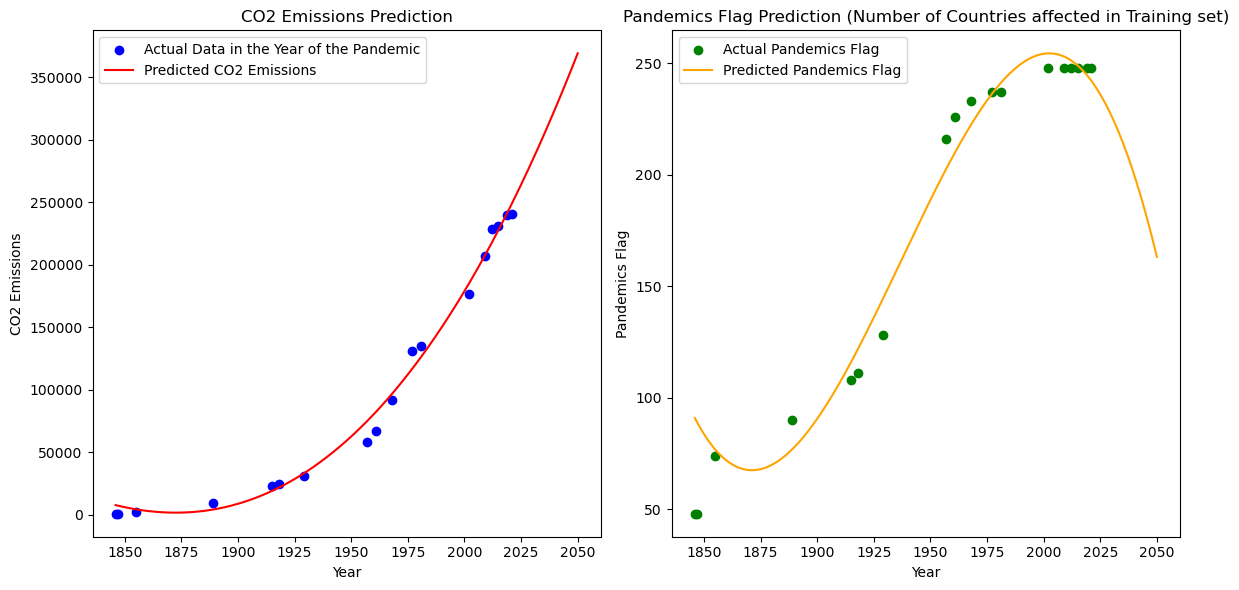

R-squared: 0.9876276421762648


In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Assuming you have a DataFrame named co2_data_copy with columns 'year', 'co2', and 'Pandemics Flag'
# Load your data (replace 'your_data.csv' with the actual file name or provide your DataFrame)
# co2_data_copy = pd.read_csv('your_data.csv')

# Group data by year and sum the CO2 emissions
co2_data = co2_data_copy.groupby('year')[['co2', 'Pandemics Flag']].sum().reset_index()

# Filter data for the provided years
selected_years = [1846, 1847, 1855, 1889, 1915, 1918, 1929, 1957, 1961, 1968, 1977, 1981, 2002, 2009, 2012, 2015, 2019, 2021]


selected_data = co2_data[co2_data['year'].isin(selected_years)]

# Separate features (X) and target variables (y_co2 and y_pandemics)
X = selected_data[['year']]
y_co2 = selected_data['co2']
y_pandemics = selected_data['Pandemics Flag']

# Split the data into training and testing sets for CO2 emissions
X_train_co2, X_test_co2, y_train_co2, y_test_co2 = train_test_split(X, y_co2, test_size=0.2, random_state=42)

# Create a linear regression model for CO2 emissions
model_co2 = make_pipeline(PolynomialFeatures(3), LinearRegression())
model_co2.fit(X_train_co2, y_train_co2)

# Make predictions for CO2 emissions
future_data['Predicted_CO2_emissions'] = model_co2.predict(future_data[['year']])


# Split the data into training and testing sets for Pandemics Flag
X_train_pandemics, X_test_pandemics, y_train_pandemics, y_test_pandemics = train_test_split(X, y_pandemics, test_size=0.2, random_state=42)

# Create a linear regression model for Pandemics Flag
model_pandemics = make_pipeline(PolynomialFeatures(3), LinearRegression())
model_pandemics.fit(X_train_pandemics, y_train_pandemics)

# Make predictions for Pandemics Flag
future_data['Predicted_Pandemics_Flag'] = model_pandemics.predict(future_data[['year']])

# Plotting
plt.figure(figsize=(12, 6))

# Plot Actual CO2 Emissions
plt.subplot(1, 2, 1)
plt.scatter(X, y_co2, color='blue', label='Actual Data in the Year of the Pandemic')
plt.plot(future_data['year'], future_data['Predicted_CO2_emissions'], color='red', label='Predicted CO2 Emissions')
plt.title('CO2 Emissions Prediction')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()

# Plot Actual Pandemics Flag
plt.subplot(1, 2, 2)
plt.scatter(X, y_pandemics, color='green', label='Actual Pandemics Flag')
plt.plot(future_data['year'], future_data['Predicted_Pandemics_Flag'], color='orange', label='Predicted Pandemics Flag')
plt.title('Pandemics Flag Prediction (Number of Countries affected in Training set)')
plt.xlabel('Year')
plt.ylabel('Pandemics Flag')
plt.legend()

plt.tight_layout()
plt.show()
# Calculate R-squared value for the model
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)

In [170]:
# Assuming co2_data contains the DataFrame with columns 'year' and 'co2'
# Filter data for the Spanish flu period (1918-1919)
spanish_flu_period = co2_data[(co2_data['year'] >= 1916) & (co2_data['year'] <= 1922)]

# Group data by year and sum the CO2 emissions for each year
total_emissions_per_year = spanish_flu_period.groupby('year')['co2'].sum()

print("Total CO2 emissions for each year during the Spanish flu period:")
print(total_emissions_per_year)


Total CO2 emissions for each year during the Spanish flu period:
year
1916    24560.298
1917    25450.989
1918    24842.169
1919    21446.094
1920    24997.031
1921    22204.348
1922    23412.251
Name: co2, dtype: float64


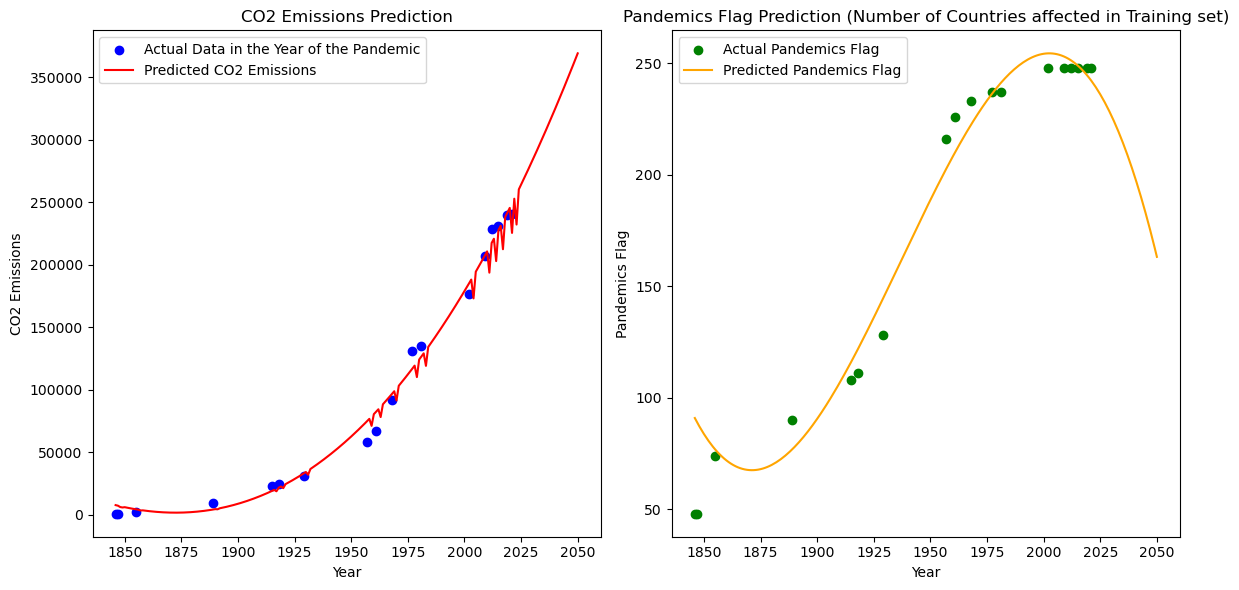

R-squared: 0.9876276421762648
R-squared for CO2 Emissions: 0.8820340644796438
R-squared for Pandemics Flag: 0.8161269199956092


In [171]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Assuming you have a DataFrame named co2_data_copy with columns 'year', 'co2', and 'Pandemics Flag'
# Load your data (replace 'your_data.csv' with the actual file name or provide your DataFrame)
# co2_data_copy = pd.read_csv('your_data.csv')

# Group data by year and sum the CO2 emissions
co2_data = co2_data_copy.groupby('year')[['co2', 'Pandemics Flag']].sum().reset_index()

# Filter data for the provided years
selected_years = [1846, 1847, 1855, 1889, 1915, 1918, 1929, 1957, 1961, 1968, 1977, 1981, 2002, 2009, 2012, 2015, 2019, 2021]

selected_data = co2_data[co2_data['year'].isin(selected_years)]

# Separate features (X) and target variables (y_co2 and y_pandemics)
X = selected_data[['year']]
y_co2 = selected_data['co2']
y_pandemics = selected_data['Pandemics Flag']

# Split the data into training and testing sets for CO2 emissions
X_train_co2, X_test_co2, y_train_co2, y_test_co2 = train_test_split(X, y_co2, test_size=0.2, random_state=42)

# Create a linear regression model for CO2 emissions
model_co2 = make_pipeline(PolynomialFeatures(3), LinearRegression())
model_co2.fit(X_train_co2, y_train_co2)

# Make predictions for CO2 emissions
future_years = list(range(1846, 2051))
future_data = pd.DataFrame({'year': future_years})

# Predict CO2 emissions
future_data['Predicted_CO2_emissions'] = model_co2.predict(future_data[['year']])

# Correct for CO2 decrease after one year of starting pandemics
pandemic_years = [1846, 1847, 1855, 1889, 1915, 1918, 1929, 1957, 1961, 1968, 1977, 1981, 2002, 2009, 2012, 2015, 2019, 2021]
for year in pandemic_years:
    if year + 2 in future_years:
        idx = future_years.index(year + 2)
        future_data.at[idx, 'Predicted_CO2_emissions'] *= 0.905  # Reduce CO2 emissions by 9.5% (average of 4.5% and 10%)

# Split the data into training and testing sets for Pandemics Flag
X_train_pandemics, X_test_pandemics, y_train_pandemics, y_test_pandemics = train_test_split(X, y_pandemics, test_size=0.2, random_state=42)

# Create a linear regression model for Pandemics Flag
model_pandemics = make_pipeline(PolynomialFeatures(3), LinearRegression())
model_pandemics.fit(X_train_pandemics, y_train_pandemics)

# Make predictions for Pandemics Flag
future_data['Predicted_Pandemics_Flag'] = model_pandemics.predict(future_data[['year']])

# Plotting
plt.figure(figsize=(12, 6))

# Plot Actual CO2 Emissions
plt.subplot(1, 2, 1)
plt.scatter(X, y_co2, color='blue', label='Actual Data in the Year of the Pandemic')
plt.plot(future_data['year'], future_data['Predicted_CO2_emissions'], color='red', label='Predicted CO2 Emissions')
plt.title('CO2 Emissions Prediction')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()

# Plot Actual Pandemics Flag
plt.subplot(1, 2, 2)
plt.scatter(X, y_pandemics, color='green', label='Actual Pandemics Flag')
plt.plot(future_data['year'], future_data['Predicted_Pandemics_Flag'], color='orange', label='Predicted Pandemics Flag')
plt.title('Pandemics Flag Prediction (Number of Countries affected in Training set)')
plt.xlabel('Year')
plt.ylabel('Pandemics Flag')
plt.legend()

# Save the plot as EPS file
plt.savefig('prediction_co2_pandemics.eps', format='eps', dpi=1000)

plt.tight_layout()
plt.show()
# Calculate R-squared value for the model
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)
# Calculate R-squared for CO2 emissions
r_squared_co2 = model_co2.score(X_test_co2, y_test_co2)
print(f"R-squared for CO2 Emissions: {r_squared_co2}")

# Calculate R-squared for Pandemics Flag
r_squared_pandemics = model_pandemics.score(X_test_pandemics, y_test_pandemics)
print(f"R-squared for Pandemics Flag: {r_squared_pandemics}")


In [172]:
# Calculate RMSE for CO2 emissions model
rmse_co2 = np.sqrt(np.mean((y_test_co2 - model_co2.predict(X_test_co2))**2))

# Calculate RMSE for Pandemics Flag model
rmse_pandemics = np.sqrt(np.mean((y_test_pandemics - model_pandemics.predict(X_test_pandemics))**2))

# Print RMSE for both models
print("RMSE for CO2 emissions model:", rmse_co2)
print("RMSE for Pandemics Flag model:", rmse_pandemics)


RMSE for CO2 emissions model: 9239.010827982895
RMSE for Pandemics Flag model: 31.167867393610646


In [173]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


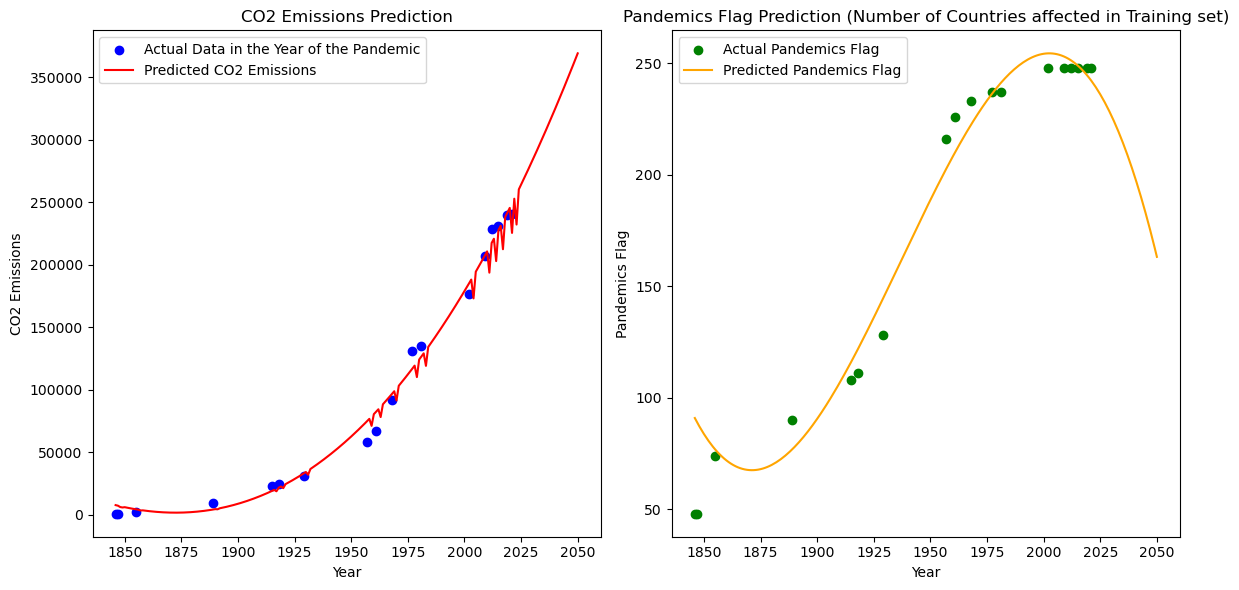

R-squared for CO2 Emissions: 0.8820340644796438
R-squared for Pandemics Flag: 0.8161269199956092
RMSE for CO2 Emissions: 9239.010827982895
RMSE for Pandemics Flag: 31.167867393610646
Breusch-Pagan test for CO2 model:
LM Statistic: 0.32392305419905254, p-value: 0.5692595165355533, f-value: 0.28422453791341845, f p-value: 0.6036792605211043
Breusch-Pagan test for Pandemics model:
LM Statistic: 2.615709468627146, p-value: 0.10581019236588585, f-value: 2.757177844067245, f p-value: 0.12270287972238059


In [174]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame named co2_data_copy with columns 'year', 'co2', and 'Pandemics Flag'
# Load your data (replace 'your_data.csv' with the actual file name or provide your DataFrame)
# co2_data_copy = pd.read_csv('your_data.csv')

# Group data by year and sum the CO2 emissions
co2_data = co2_data_copy.groupby('year')[['co2', 'Pandemics Flag']].sum().reset_index()

# Filter data for the provided years
selected_years = [1846, 1847, 1855, 1889, 1915, 1918, 1929, 1957, 1961, 1968, 1977, 1981, 2002, 2009, 2012, 2015, 2019, 2021]

selected_data = co2_data[co2_data['year'].isin(selected_years)]

# Separate features (X) and target variables (y_co2 and y_pandemics)
X = selected_data[['year']]
y_co2 = selected_data['co2']
y_pandemics = selected_data['Pandemics Flag']

# Split the data into training and testing sets for CO2 emissions
X_train_co2, X_test_co2, y_train_co2, y_test_co2 = train_test_split(X, y_co2, test_size=0.2, random_state=42)

# Create a linear regression model for CO2 emissions
model_co2 = make_pipeline(PolynomialFeatures(3), LinearRegression())
model_co2.fit(X_train_co2, y_train_co2)

# Make predictions for CO2 emissions
future_years = list(range(1846, 2051))
future_data = pd.DataFrame({'year': future_years})

# Predict CO2 emissions
future_data['Predicted_CO2_emissions'] = model_co2.predict(future_data[['year']])

# Correct for CO2 decrease after one year of starting pandemics
pandemic_years = [1846, 1847, 1855, 1889, 1915, 1918, 1929, 1957, 1961, 1968, 1977, 1981, 2002, 2009, 2012, 2015, 2019, 2021]
for year in pandemic_years:
    if year + 2 in future_years:
        idx = future_years.index(year + 2)
        future_data.at[idx, 'Predicted_CO2_emissions'] *= 0.905  # Reduce CO2 emissions by 9.5% (average of 4.5% and 10%)

# Split the data into training and testing sets for Pandemics Flag
X_train_pandemics, X_test_pandemics, y_train_pandemics, y_test_pandemics = train_test_split(X, y_pandemics, test_size=0.2, random_state=42)

# Create a linear regression model for Pandemics Flag
model_pandemics = make_pipeline(PolynomialFeatures(3), LinearRegression())
model_pandemics.fit(X_train_pandemics, y_train_pandemics)

# Make predictions for Pandemics Flag
future_data['Predicted_Pandemics_Flag'] = model_pandemics.predict(future_data[['year']])

# Plotting
plt.figure(figsize=(12, 6))

# Plot Actual CO2 Emissions
plt.subplot(1, 2, 1)
plt.scatter(X, y_co2, color='blue', label='Actual Data in the Year of the Pandemic')
plt.plot(future_data['year'], future_data['Predicted_CO2_emissions'], color='red', label='Predicted CO2 Emissions')
plt.title('CO2 Emissions Prediction')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()

# Plot Actual Pandemics Flag
plt.subplot(1, 2, 2)
plt.scatter(X, y_pandemics, color='green', label='Actual Pandemics Flag')
plt.plot(future_data['year'], future_data['Predicted_Pandemics_Flag'], color='orange', label='Predicted Pandemics Flag')
plt.title('Pandemics Flag Prediction (Number of Countries affected in Training set)')
plt.xlabel('Year')
plt.ylabel('Pandemics Flag')
plt.legend()

# Save the plot as EPS file
plt.savefig('prediction_co2_pandemics.eps', format='eps', dpi=1000)

plt.tight_layout()
plt.show()

# Calculate R-squared for CO2 emissions
r_squared_co2 = model_co2.score(X_test_co2, y_test_co2)
print(f"R-squared for CO2 Emissions: {r_squared_co2}")

# Calculate R-squared for Pandemics Flag
r_squared_pandemics = model_pandemics.score(X_test_pandemics, y_test_pandemics)
print(f"R-squared for Pandemics Flag: {r_squared_pandemics}")

# Calculate RMSE for CO2 emissions
y_pred_co2 = model_co2.predict(X_test_co2)
rmse_co2 = np.sqrt(mean_squared_error(y_test_co2, y_pred_co2))
print(f"RMSE for CO2 Emissions: {rmse_co2}")

# Calculate RMSE for Pandemics Flag
y_pred_pandemics = model_pandemics.predict(X_test_pandemics)
rmse_pandemics = np.sqrt(mean_squared_error(y_test_pandemics, y_pred_pandemics))
print(f"RMSE for Pandemics Flag: {rmse_pandemics}")

# Perform Breusch-Pagan test for heteroskedasticity on CO2 model
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

X_train_co2_const = sm.add_constant(X_train_co2)
bp_test_co2 = het_breuschpagan(y_train_co2 - model_co2.predict(X_train_co2), X_train_co2_const)
print("Breusch-Pagan test for CO2 model:")
print(f"LM Statistic: {bp_test_co2[0]}, p-value: {bp_test_co2[1]}, f-value: {bp_test_co2[2]}, f p-value: {bp_test_co2[3]}")

# Perform Breusch-Pagan test for heteroskedasticity on Pandemics model
X_train_pandemics_const = sm.add_constant(X_train_pandemics)
bp_test_pandemics = het_breuschpagan(y_train_pandemics - model_pandemics.predict(X_train_pandemics), X_train_pandemics_const)
print("Breusch-Pagan test for Pandemics model:")
print(f"LM Statistic: {bp_test_pandemics[0]}, p-value: {bp_test_pandemics[1]}, f-value: {bp_test_pandemics[2]}, f p-value: {bp_test_pandemics[3]}")


In [175]:
co2_data_flag=co2_data_copy.copy()

In [176]:
# Add a new column 'flag_rev' and initialize it to 0
co2_data_flag['flag_rev'] = 0


In [177]:
co2_data_flag.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,Pandemics Flag,flag_rev
99,Afghanistan,1949,AFG,7624058.0,NaN,0.0,0.0,0.015,NaN,NaN,...,0.0,0.160,0.000,NaN,NaN,NaN,NaN,NaN,0,0
100,Afghanistan,1950,AFG,7480464.0,9.421400e+09,0.0,0.0,0.084,0.070,475.000,...,0.0,0.157,0.004,NaN,NaN,NaN,NaN,NaN,0,0
101,Afghanistan,1951,AFG,7571542.0,9.692280e+09,0.0,0.0,0.092,0.007,8.696,...,0.0,0.162,0.004,NaN,NaN,NaN,NaN,NaN,0,0
102,Afghanistan,1952,AFG,7667534.0,1.001733e+10,0.0,0.0,0.092,0.000,0.000,...,0.0,0.172,0.003,NaN,NaN,NaN,NaN,NaN,0,0
103,Afghanistan,1953,AFG,7764549.0,1.063052e+10,0.0,0.0,0.106,0.015,16.000,...,0.0,0.185,0.003,NaN,NaN,NaN,NaN,NaN,0,0


In [178]:
# List of dates to set flag_rev to 1
#industrial_revolution_dates = [1764, 1769, 1775, 1782, 1785, 1829] + list(range(1830, 1841)) + [1876, 1886]
industrial_revolution_dates = list(range(1760, 1840)) + list(range(1840, 1914)) + list(range(1950, 1970)) + list(range(2000, 2021))
# Set flag_rev to 1 for the specified dates
co2_data_flag.loc[co2_data_flag['year'].isin(industrial_revolution_dates), 'flag_rev'] = 1


In [179]:
# Check lines with flag_rev = 1
industrial_revolution_lines = co2_data_flag[co2_data_flag['flag_rev'] == 1]
print(industrial_revolution_lines)


           country  year iso_code  population           gdp  cement_co2  \
100    Afghanistan  1950      AFG   7480464.0  9.421400e+09       0.000   
101    Afghanistan  1951      AFG   7571542.0  9.692280e+09       0.000   
102    Afghanistan  1952      AFG   7667534.0  1.001733e+10       0.000   
103    Afghanistan  1953      AFG   7764549.0  1.063052e+10       0.000   
104    Afghanistan  1954      AFG   7864289.0  1.086636e+10       0.000   
...            ...   ...      ...         ...           ...         ...   
46517     Zimbabwe  2016      ZWE  14452705.0  2.096179e+10       0.461   
46518     Zimbabwe  2017      ZWE  14751101.0  2.194784e+10       0.469   
46519     Zimbabwe  2018      ZWE  15052191.0  2.271535e+10       0.558   
46520     Zimbabwe  2019      ZWE  15354606.0           NaN       0.570   
46521     Zimbabwe  2020      ZWE  15669663.0           NaN       0.570   

       cement_co2_per_capita     co2  co2_growth_abs  co2_growth_prct  ...  \
100                  

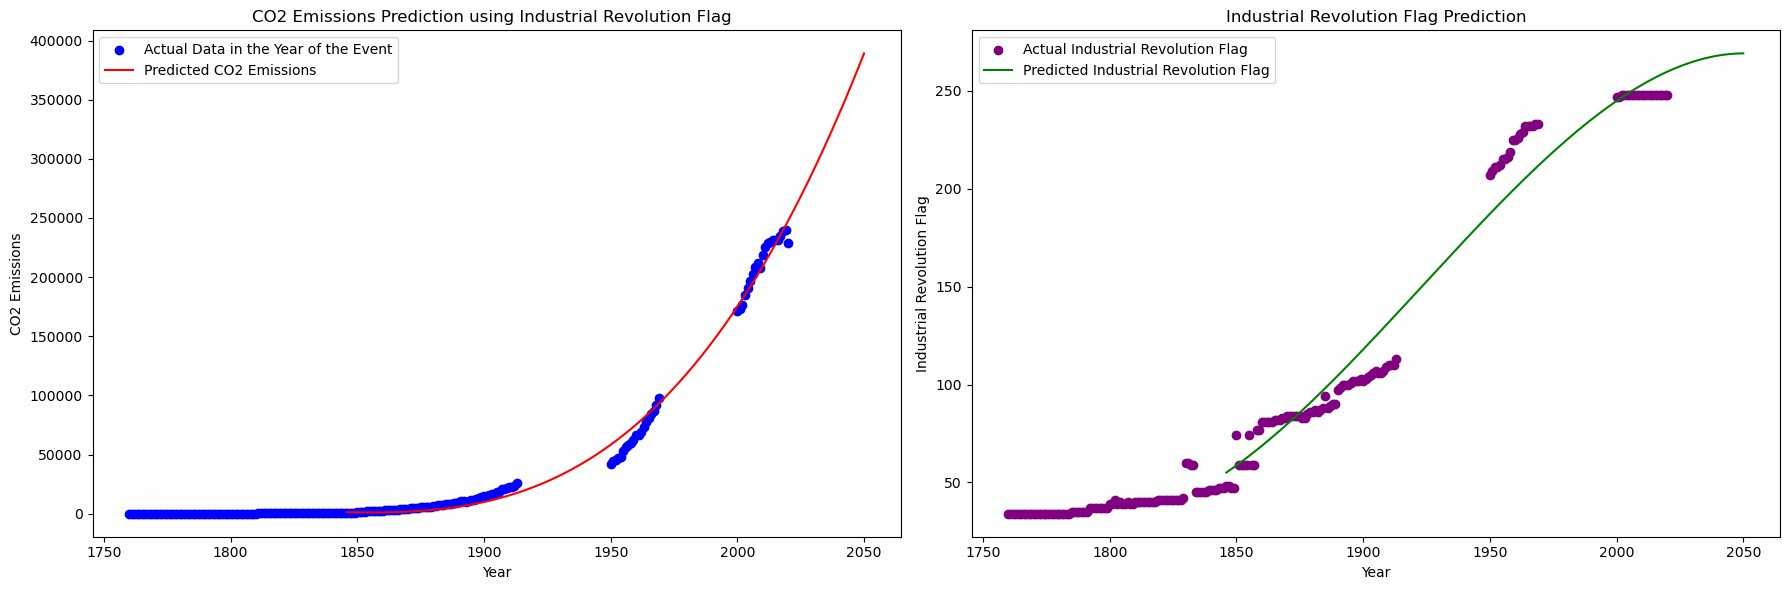

In [180]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Assuming you have a DataFrame named co2_data_copy with columns 'year', 'co2', 'Pandemics Flag', and 'flag_rev'
# Load your data (replace 'your_data.csv' with the actual file name or provide your DataFrame)
# co2_data_copy = pd.read_csv('your_data.csv')

# Group data by year and sum the CO2 emissions
co2_data = co2_data_flag.groupby('year')[['co2' , 'flag_rev']].sum().reset_index()
industrial_revolution_dates = list(range(1760, 1840)) + list(range(1840, 1914)) + list(range(1950, 1970)) + list(range(2000, 2021))
#industrial_revolution_dates = [1764, 1769, 1775, 1782, 1785, 1829] + list(range(1830, 1841)) + [1876, 1886]
# Filter data for the provided years
#selected_years = [1846, 1847, 1855, 1889, 1915, 1918, 1929, 1957, 1961, 1968, 1977, 1981, 2002, 2009, 2012, 2015, 2019, 2021]

selected_data = co2_data[co2_data['year'].isin(industrial_revolution_dates)]

# Separate features (X) and target variables (y_co2, y_pandemics, and y_rev)
X = selected_data[['year']]
y_co2 = selected_data['co2']
#y_pandemics = selected_data['Pandemics Flag']
y_rev = selected_data['flag_rev']

# Split the data into training and testing sets for CO2 emissions
X_train_co2, X_test_co2, y_train_co2, y_test_co2 = train_test_split(X, y_co2, test_size=0.2, random_state=42)

# Create a linear regression model for CO2 emissions
model_co2 = make_pipeline(PolynomialFeatures(3), LinearRegression())
model_co2.fit(X_train_co2, y_train_co2)

# Make predictions for CO2 emissions
future_data['Predicted_CO2_emissions'] = model_co2.predict(future_data[['year']])

# Split the data into training and testing sets for Industrial Revolution Flag
X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(X, y_rev, test_size=0.2, random_state=42)

# Create a linear regression model for Industrial Revolution Flag
model_rev = make_pipeline(PolynomialFeatures(3), LinearRegression())
model_rev.fit(X_train_rev, y_train_rev)

# Make predictions for Industrial Revolution Flag
future_data['Predicted_Rev_Flag'] = model_rev.predict(future_data[['year']])

# Plotting
plt.figure(figsize=(18, 6))

# Plot Actual CO2 Emissions
plt.subplot(1, 2, 1)
plt.scatter(X, y_co2, color='blue', label='Actual Data in the Year of the Event')
plt.plot(future_data['year'], future_data['Predicted_CO2_emissions'], color='red', label='Predicted CO2 Emissions')
plt.title('CO2 Emissions Prediction using Industrial Revolution Flag  ')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()



# Plot Actual Industrial Revolution Flag
plt.subplot(1, 2, 2)
plt.scatter(X, y_rev, color='purple', label='Actual Industrial Revolution Flag')
plt.plot(future_data['year'], future_data['Predicted_Rev_Flag'], color='green', label='Predicted Industrial Revolution Flag')
plt.title('Industrial Revolution Flag Prediction')
plt.xlabel('Year')
plt.ylabel('Industrial Revolution Flag')
plt.legend()

plt.tight_layout()

plt.show()


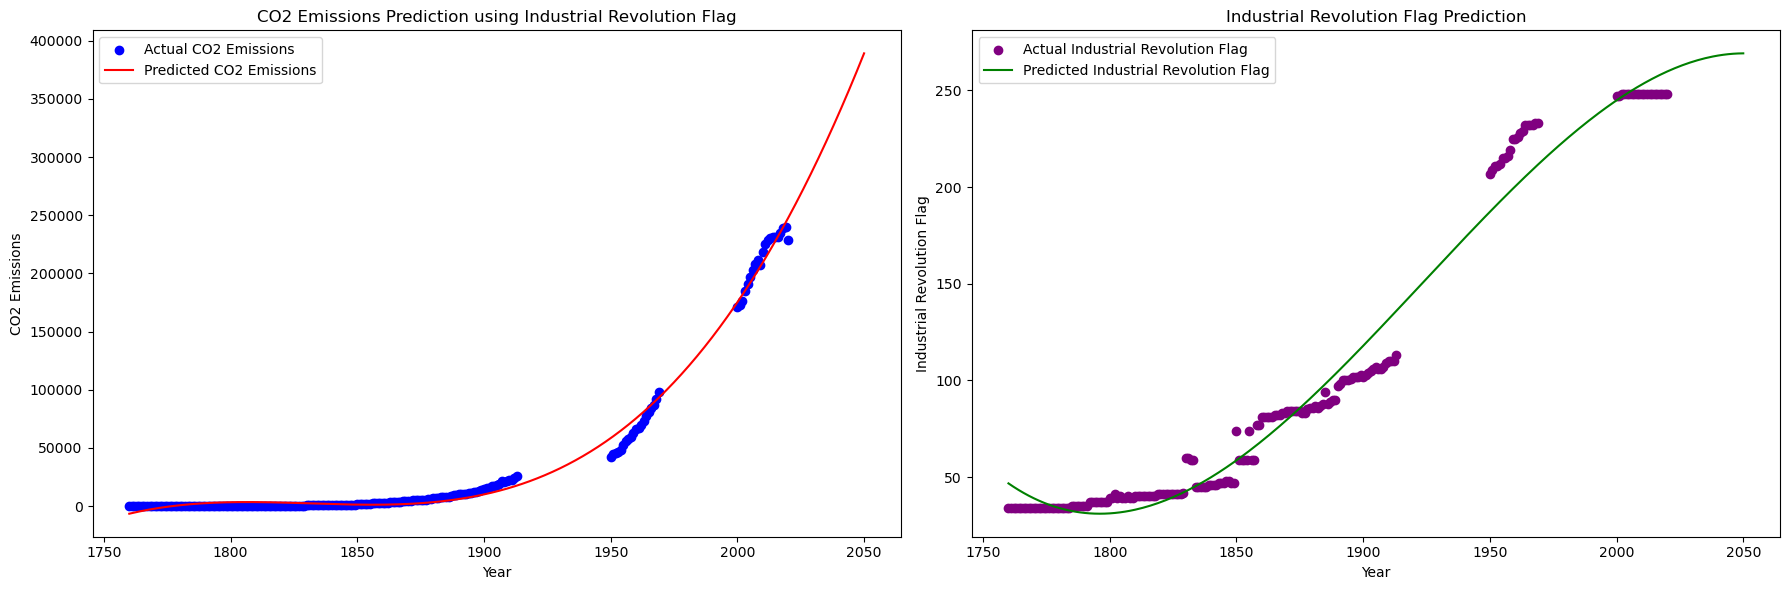

R-squared for CO2 Emissions: 0.9911190454815463
R-squared for Industrial Revolution Flag: 0.9740522260603538


In [181]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Assuming you have a DataFrame named co2_data_flag with columns 'year', 'co2', 'Pandemics Flag', and 'flag_rev'
# Load your data (replace 'your_data.csv' with the actual file name or provide your DataFrame)
# co2_data_flag = pd.read_csv('your_data.csv')

# Group data by year and sum the CO2 emissions and industrial revolution flags
co2_data = co2_data_flag.groupby('year')[['co2', 'flag_rev']].sum().reset_index()

# Define industrial revolution dates
industrial_revolution_dates = list(range(1760, 1840)) + list(range(1840, 1914)) + list(range(1950, 1970)) + list(range(2000, 2021))

# Filter data for the provided industrial revolution years
selected_data = co2_data[co2_data['year'].isin(industrial_revolution_dates)]

# Separate features (X) and target variables (y_co2 and y_rev)
X = selected_data[['year']]
y_co2 = selected_data['co2']
y_rev = selected_data['flag_rev']

# Split the data into training and testing sets
X_train, X_test, y_train_co2, y_test_co2, y_train_rev, y_test_rev = train_test_split(X, y_co2, y_rev, test_size=0.2, random_state=42)

# Create polynomial regression models
model_co2 = make_pipeline(PolynomialFeatures(3), LinearRegression())
model_rev = make_pipeline(PolynomialFeatures(3), LinearRegression())

# Fit the models
model_co2.fit(X_train, y_train_co2)
model_rev.fit(X_train, y_train_rev)

# Make predictions
future_years = pd.DataFrame({'year': range(1760, 2051)})
future_years['Predicted_CO2_emissions'] = model_co2.predict(future_years[['year']])
future_years['Predicted_Rev_Flag'] = model_rev.predict(future_years[['year']])

# Plotting
plt.figure(figsize=(18, 6))

# Plot CO2 emissions
plt.subplot(1, 2, 1)
plt.scatter(X, y_co2, color='blue', label='Actual CO2 Emissions')
plt.plot(future_years['year'], future_years['Predicted_CO2_emissions'], color='red', label='Predicted CO2 Emissions')
plt.title('CO2 Emissions Prediction using Industrial Revolution Flag')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()

# Plot Industrial Revolution Flag
plt.subplot(1, 2, 2)
plt.scatter(X, y_rev, color='purple', label='Actual Industrial Revolution Flag')
plt.plot(future_years['year'], future_years['Predicted_Rev_Flag'], color='green', label='Predicted Industrial Revolution Flag')
plt.title('Industrial Revolution Flag Prediction')
plt.xlabel('Year')
plt.ylabel('Industrial Revolution Flag')
plt.legend()

plt.tight_layout()
plt.savefig('prediction_co2_IR.eps', format='eps', dpi=1000)
plt.show()
# Calculate R-squared for CO2 emissions
r_squared_co2 = model_co2.score(X_test, y_test_co2)
print(f"R-squared for CO2 Emissions: {r_squared_co2}")

# Calculate R-squared for Industrial Revolution Flag
r_squared_rev = model_rev.score(X_test, y_test_rev)
print(f"R-squared for Industrial Revolution Flag: {r_squared_rev}")


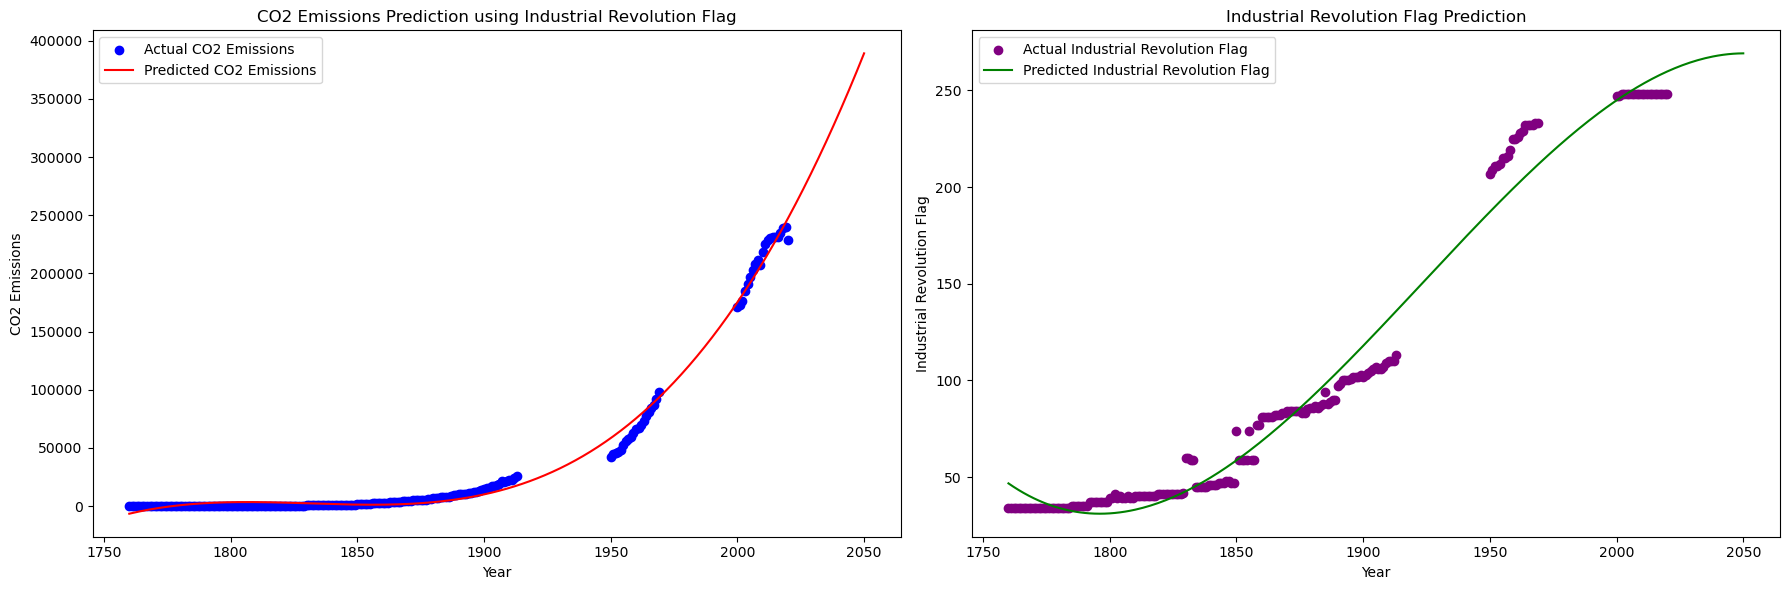

R-squared for CO2 Emissions: 0.9911190454815463
R-squared for Industrial Revolution Flag: 0.9740522260603538
RMSE for CO2 Emissions: 5026.250414361343
RMSE for Industrial Revolution Flag: 11.562621884568575
Breusch-Pagan test for CO2 model:
LM Statistic: 8.710982449484543, p-value: 0.003162987016049985, f-value: 10.64103020487184, f p-value: 0.0023809920986246798
Breusch-Pagan test for Industrial Revolution model:
LM Statistic: 16.639775778364257, p-value: 4.5193254103082426e-05, f-value: 27.534236584432538, f p-value: 6.555004743787572e-06


In [182]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming you have a DataFrame named co2_data_flag with columns 'year', 'co2', 'Pandemics Flag', and 'flag_rev'
# Load your data (replace 'your_data.csv' with the actual file name or provide your DataFrame)
# co2_data_flag = pd.read_csv('your_data.csv')

# Group data by year and sum the CO2 emissions and industrial revolution flags
co2_data = co2_data_flag.groupby('year')[['co2', 'flag_rev']].sum().reset_index()

# Define industrial revolution dates
industrial_revolution_dates = list(range(1760, 1840)) + list(range(1840, 1914)) + list(range(1950, 1970)) + list(range(2000, 2021))

# Filter data for the provided industrial revolution years
selected_data = co2_data[co2_data['year'].isin(industrial_revolution_dates)]

# Separate features (X) and target variables (y_co2 and y_rev)
X = selected_data[['year']]
y_co2 = selected_data['co2']
y_rev = selected_data['flag_rev']

# Split the data into training and testing sets
X_train, X_test, y_train_co2, y_test_co2, y_train_rev, y_test_rev = train_test_split(X, y_co2, y_rev, test_size=0.2, random_state=42)

# Create polynomial regression models
model_co2 = make_pipeline(PolynomialFeatures(3), LinearRegression())
model_rev = make_pipeline(PolynomialFeatures(3), LinearRegression())

# Fit the models
model_co2.fit(X_train, y_train_co2)
model_rev.fit(X_train, y_train_rev)

# Make predictions
future_years = pd.DataFrame({'year': range(1760, 2051)})
future_years['Predicted_CO2_emissions'] = model_co2.predict(future_years[['year']])
future_years['Predicted_Rev_Flag'] = model_rev.predict(future_years[['year']])

# Plotting
plt.figure(figsize=(18, 6))

# Plot CO2 emissions
plt.subplot(1, 2, 1)
plt.scatter(X, y_co2, color='blue', label='Actual CO2 Emissions')
plt.plot(future_years['year'], future_years['Predicted_CO2_emissions'], color='red', label='Predicted CO2 Emissions')
plt.title('CO2 Emissions Prediction using Industrial Revolution Flag')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()

# Plot Industrial Revolution Flag
plt.subplot(1, 2, 2)
plt.scatter(X, y_rev, color='purple', label='Actual Industrial Revolution Flag')
plt.plot(future_years['year'], future_years['Predicted_Rev_Flag'], color='green', label='Predicted Industrial Revolution Flag')
plt.title('Industrial Revolution Flag Prediction')
plt.xlabel('Year')
plt.ylabel('Industrial Revolution Flag')
plt.legend()

plt.tight_layout()
plt.savefig('prediction_co2_IR.eps', format='eps', dpi=1000)
plt.show()

# Calculate R-squared for CO2 emissions
r_squared_co2 = model_co2.score(X_test, y_test_co2)
print(f"R-squared for CO2 Emissions: {r_squared_co2}")

# Calculate R-squared for Industrial Revolution Flag
r_squared_rev = model_rev.score(X_test, y_test_rev)
print(f"R-squared for Industrial Revolution Flag: {r_squared_rev}")

# Calculate RMSE for CO2 emissions
y_pred_co2 = model_co2.predict(X_test)
rmse_co2 = np.sqrt(mean_squared_error(y_test_co2, y_pred_co2))
print(f"RMSE for CO2 Emissions: {rmse_co2}")

# Calculate RMSE for Industrial Revolution Flag
y_pred_rev = model_rev.predict(X_test)
rmse_rev = np.sqrt(mean_squared_error(y_test_rev, y_pred_rev))
print(f"RMSE for Industrial Revolution Flag: {rmse_rev}")

# Perform Breusch-Pagan test for CO2 model
residuals_co2 = y_test_co2 - y_pred_co2
exog = sm.add_constant(X_test)
bp_test_co2 = het_breuschpagan(residuals_co2, exog)
print(f"Breusch-Pagan test for CO2 model:\nLM Statistic: {bp_test_co2[0]}, p-value: {bp_test_co2[1]}, f-value: {bp_test_co2[2]}, f p-value: {bp_test_co2[3]}")

# Perform Breusch-Pagan test for Industrial Revolution model
residuals_rev = y_test_rev - y_pred_rev
bp_test_rev = het_breuschpagan(residuals_rev, exog)
print(f"Breusch-Pagan test for Industrial Revolution model:\nLM Statistic: {bp_test_rev[0]}, p-value: {bp_test_rev[1]}, f-value: {bp_test_rev[2]}, f p-value: {bp_test_rev[3]}")


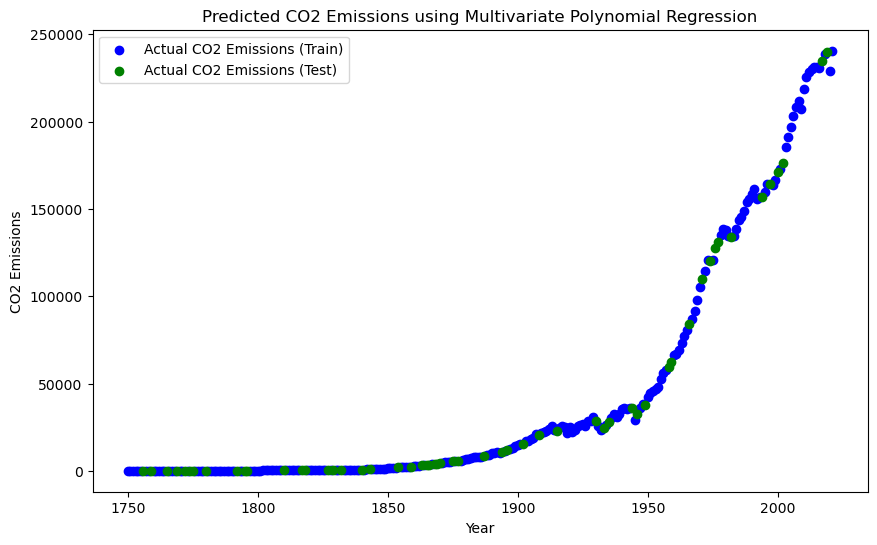

R-squared for Train Set: 0.9949188238474975
R-squared for Test Set: 0.98989920266669


In [183]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Assuming you have a DataFrame named co2_data_flag with columns 'year', 'co2', 'Pandemics Flag', and 'flag_rev'
# Group data by year and sum the CO2 emissions and industrial revolution flags
co2_data = co2_data_flag.groupby('year')[['co2', 'Pandemics Flag', 'flag_rev']].sum().reset_index()

# Separate features (X) and target variable (y_co2)
X = co2_data[['year', 'Pandemics Flag', 'flag_rev']]
y_co2 = co2_data['co2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_co2, test_size=0.2, random_state=42)

# Create a polynomial regression model
model = make_pipeline(PolynomialFeatures(3), LinearRegression())

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Plot predicted CO2 emissions
plt.figure(figsize=(10, 6))
plt.scatter(X_train['year'], y_train, color='blue', label='Actual CO2 Emissions (Train)')
plt.scatter(X_test['year'], y_test, color='green', label='Actual CO2 Emissions (Test)')

plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('Predicted CO2 Emissions using Multivariate Polynomial Regression')
plt.legend()
plt.show()

# Calculate R-squared for train and test sets
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)
print(f"R-squared for Train Set: {r2_train}")
print(f"R-squared for Test Set: {r2_test}")


R-squared for CO2 Emissions: 0.9988419072096759


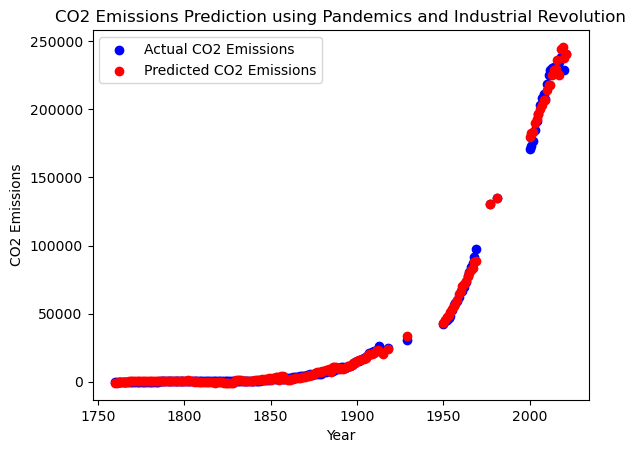

In [184]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
# Assuming you have a DataFrame named co2_data_copy with columns 'year', 'co2', 'Pandemics Flag', and 'flag_rev'
# Load your data (replace 'your_data.csv' with the actual file name or provide your DataFrame)
# co2_data_copy = pd.read_csv('your_data.csv')

# Group data by year and sum the CO2 emissions
co2_data = co2_data_flag.groupby('year')[['co2', 'Pandemics Flag', 'flag_rev']].sum().reset_index()
#industrial_revolution_dates = [1764, 1769, 1775, 1782, 1785, 1829] + list(range(1830, 1841)) + [1876, 1886]
industrial_revolution_dates = list(range(1760, 1840)) + list(range(1840, 1914)) + list(range(1950, 1970)) + list(range(2000, 2021))
selected_years = [1846, 1847, 1855, 1889, 1915, 1918, 1929, 1957, 1961, 1968, 1977, 1981, 2002, 2009, 2012, 2015, 2019, 2021]
all_years = industrial_revolution_dates + selected_years
# Filter data for the provided years
selected_data = co2_data[co2_data['year'].isin(all_years)]

# Separate features (X) and target variable (y_co2)
X = selected_data[['year', 'Pandemics Flag', 'flag_rev']]
y_co2 = selected_data['co2']

# Split the data into training and testing sets for CO2 emissions
X_train_co2, X_test_co2, y_train_co2, y_test_co2 = train_test_split(X, y_co2, test_size=0.2, random_state=42)

# Create a multivariate polynomial regression model for CO2 emissions
degree = 3  # Set the degree of the polynomial
model_co2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_co2.fit(X_train_co2, y_train_co2)

# Make predictions for CO2 emissions
y_pred_co2 = model_co2.predict(X_test_co2)



# Fit the model
model_co2.fit(X, y_co2)

# Make predictions for CO2 emissions
y_pred_co2 = model_co2.predict(X)

# Calculate R-squared
r_squared = r2_score(y_co2, y_pred_co2)
print(f"R-squared for CO2 Emissions: {r_squared}")


# Plotting
plt.scatter(X['year'], y_co2, color='blue', label='Actual CO2 Emissions')
plt.scatter(X['year'], model_co2.predict(X), color='red', label='Predicted CO2 Emissions')
plt.title('CO2 Emissions Prediction using Pandemics and Industrial Revolution')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.26895e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.49514e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.34448e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.47627e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

R-squared: 0.9923638979417596


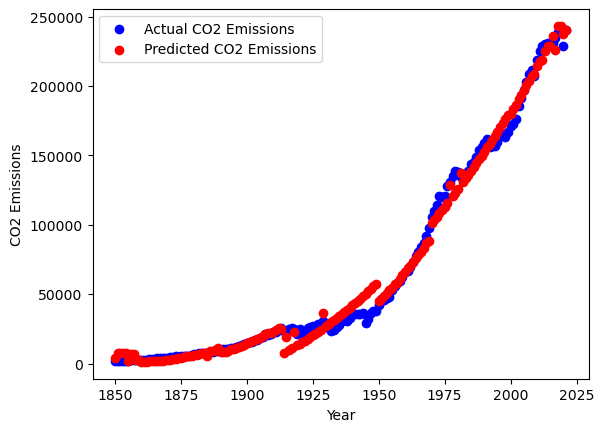

In [185]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named co2_data_flag with columns 'year', 'co2', 'Pandemics Flag', and 'flag_rev'

# Group data by year and sum the CO2 emissions
co2_data = co2_data_flag.groupby('year')[['co2', 'Pandemics Flag', 'flag_rev']].sum().reset_index()


# Filter data for the provided years
# Filter data for the years ranging from 1850 to 2021
selected_data = co2_data[(co2_data['year'] >= 1850) & (co2_data['year'] <= 2021)]


# Separate features (X) and target variable (y_co2)
X = selected_data[['year', 'Pandemics Flag', 'flag_rev']]
y_co2 = selected_data['co2']

# Create a pipeline with polynomial features and Ridge regression
degree = 3  # Set the degree of the polynomial
model_co2 = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))

# Perform cross-validation
cv_scores = cross_val_score(model_co2, X, y_co2, cv=5, scoring='neg_mean_squared_error')

# Fit the model
model_co2.fit(X, y_co2)

# Make predictions for CO2 emissions
y_pred_co2 = model_co2.predict(X)

# Calculate R-squared
r2 = r2_score(y_co2, y_pred_co2)
print(f"R-squared: {r2}")  # Print the R-squared value

# Plotting
plt.scatter(X['year'], y_co2, color='blue', label='Actual CO2 Emissions')
plt.scatter(X['year'], y_pred_co2, color='red', label='Predicted CO2 Emissions')
#plt.title('Predicted CO2 Emissions with Polynomial Regression using Pandemics and Industrial Revolution Flags')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.savefig('prediction_co2_precis.eps', format='eps', dpi=1000)
plt.show()


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


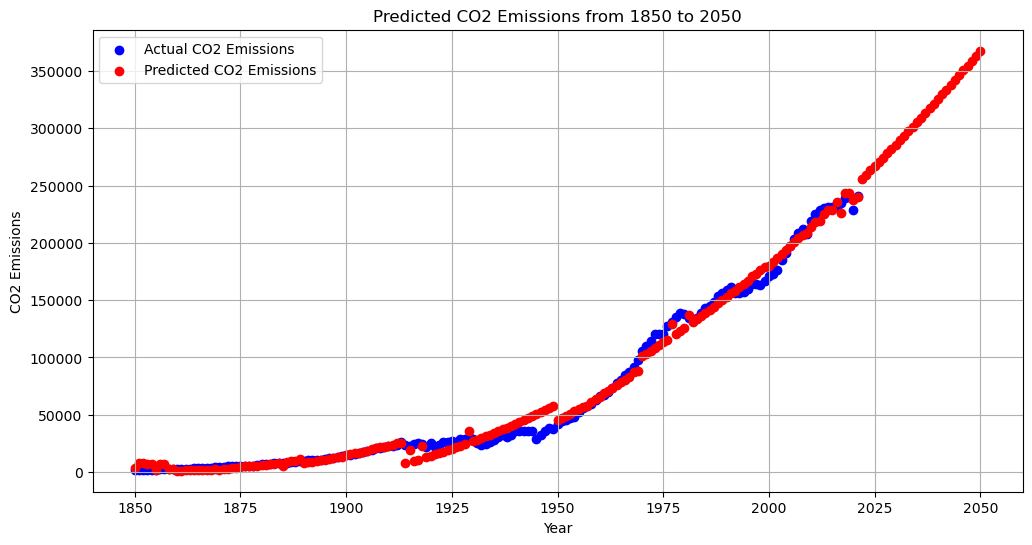

Root Mean Squared Error (RMSE) for extended period: 6454.392011815495


In [194]:
# Extend the DataFrame to include years from 2022 to 2050
extended_years = pd.DataFrame({'year': range(2022, 2051)})
extended_data = pd.concat([selected_data, extended_years], ignore_index=True)

# Predict CO2 emissions for the extended period
X_extended = extended_data[['year', 'Pandemics Flag', 'flag_rev']]
# Replace missing values with a specified value (e.g., 0)
X_extended.fillna(0, inplace=True)

# Predict CO2 emissions for the extended period
y_pred_co2_extended = model_co2.predict(X_extended)

# Plot the extended forecast
plt.figure(figsize=(12, 6))
plt.scatter(extended_data['year'], extended_data['co2'], color='blue', label='Actual CO2 Emissions')
plt.scatter(extended_data['year'], y_pred_co2_extended, color='red', label='Predicted CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('Predicted CO2 Emissions from 1850 to 2050')
plt.legend()
plt.grid(True)
plt.savefig('prediction_co2_extended.eps', format='eps', dpi=1000)
plt.show()
from sklearn.metrics import mean_squared_error

# Trim the predicted data to match the length of the actual data
y_pred_co2_extended_trimmed = y_pred_co2_extended[:len(actual_data)]

# Calculate RMSE for the trimmed predicted data
rmse_extended = np.sqrt(mean_squared_error(actual_data['co2'], y_pred_co2_extended_trimmed))

# Print RMSE for extended period
print("Root Mean Squared Error (RMSE) for extended period:", rmse_extended)


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


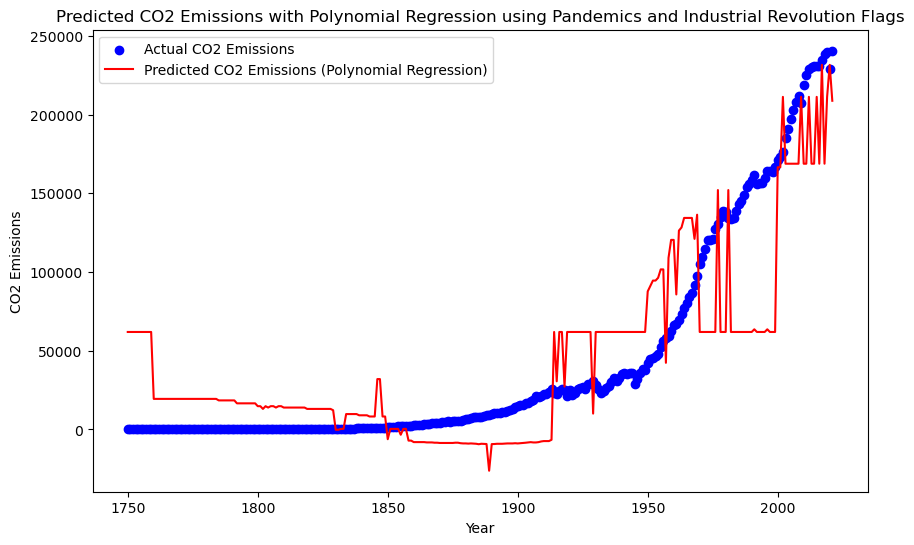

R-squared: 0.6870159239877938
Root Mean Squared Error (RMSE): 37742.15250778245


In [190]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming you have a DataFrame named co2_data_flag with columns 'year', 'co2', 'Pandemics Flag', and 'flag_rev'
# Group data by year and sum the CO2 emissions, pandemic flag, and industrial revolution flag
co2_data = co2_data_flag.groupby('year')[['co2', 'Pandemics Flag', 'flag_rev']].sum().reset_index()

# Separate features (X) and target variable (y_co2)
X = co2_data[['Pandemics Flag', 'flag_rev']]
y_co2 = co2_data['co2']

# Polynomial regression with degree 3
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y_co2)

# Generate new data for prediction
new_pandemics_flag = np.linspace(0, 1, 100)  # Example values for pandemic flag
new_flag_rev = np.linspace(0, 1, 100)        # Example values for industrial revolution flag
X_new = np.column_stack((new_pandemics_flag, new_flag_rev))
X_new_poly = poly.transform(X_new)

# Make predictions
y_pred_co2 = model.predict(X_new_poly)

# Plot predicted CO2 emissions
plt.figure(figsize=(10, 6))
plt.scatter(co2_data['year'], co2_data['co2'], color='blue', label='Actual CO2 Emissions')
plt.plot(co2_data['year'], model.predict(X_poly), color='red', label='Predicted CO2 Emissions (Polynomial Regression)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('Predicted CO2 Emissions with Polynomial Regression using Pandemics and Industrial Revolution Flags')
plt.legend()
plt.show()


# Calculate R-squared
r_squared = r2_score(y_co2, model.predict(X_poly))

# Print the R-squared value
print(f"R-squared: {r_squared}")




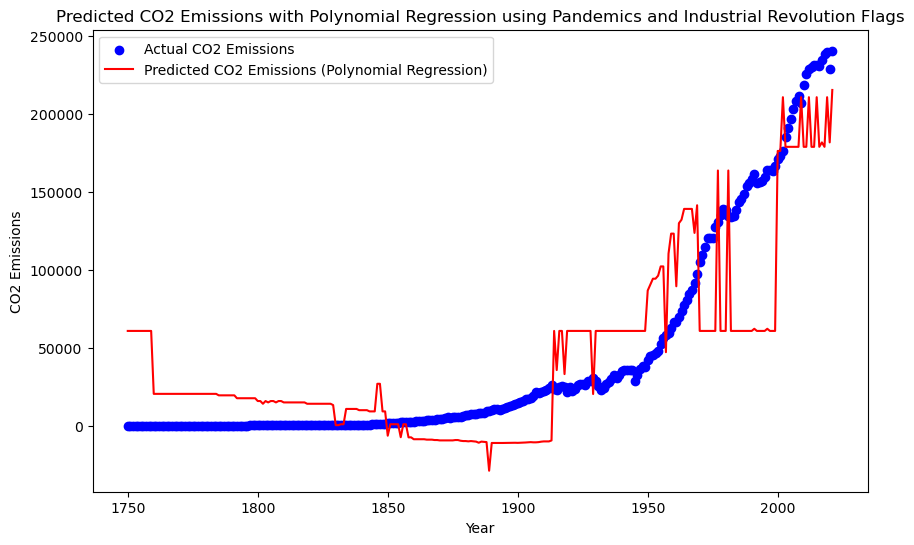

R-squared for Train Set: 0.6807202580134852
R-squared for Test Set: 0.6816430361797672


In [188]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named co2_data_flag with columns 'year', 'co2', 'Pandemics Flag', and 'flag_rev'
# Group data by year and sum the CO2 emissions, pandemic flag, and industrial revolution flag
co2_data = co2_data_flag.groupby('year')[['co2', 'Pandemics Flag', 'flag_rev']].sum().reset_index()

# Separate features (X) and target variable (y_co2)
X = co2_data[['Pandemics Flag', 'flag_rev']]
y_co2 = co2_data['co2']

# Split the data into training and testing sets without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y_co2, test_size=0.2, random_state=42, stratify=None)


# Create a pipeline with polynomial features, standardization, and Ridge regression
model = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    Ridge()
)

# Define hyperparameters to search
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1.0, 10.0],
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Calculate R-squared for train and test sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Plot predicted CO2 emissions
plt.figure(figsize=(10, 6))
plt.scatter(co2_data['year'], co2_data['co2'], color='blue', label='Actual CO2 Emissions')
plt.plot(co2_data['year'], best_model.predict(X), color='red', label='Predicted CO2 Emissions (Polynomial Regression)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('Predicted CO2 Emissions with Polynomial Regression using Pandemics and Industrial Revolution Flags')
plt.legend()
plt.show()

print(f"R-squared for Train Set: {r2_train}")
print(f"R-squared for Test Set: {r2_test}")


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


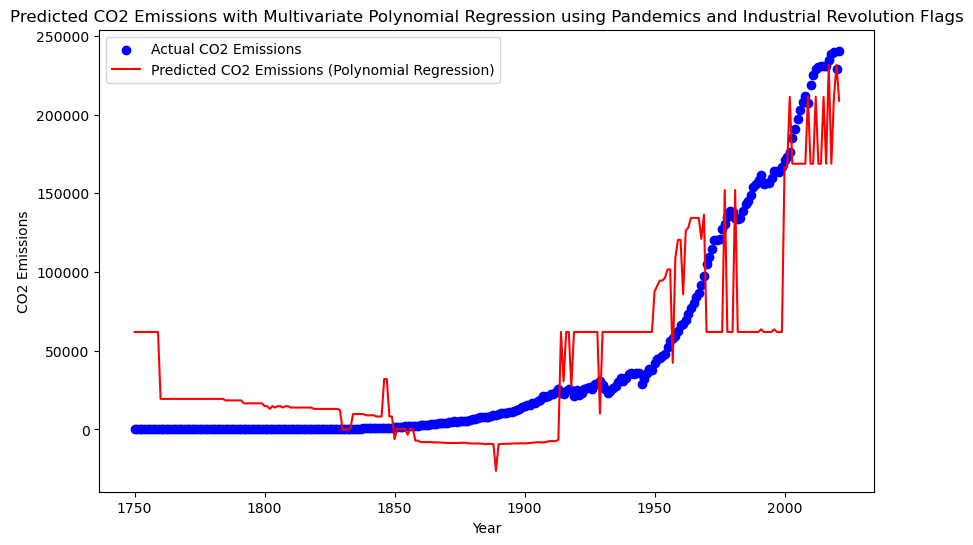

R-squared: 0.6870159239877938
We used multivariate polynomial regression to predict CO2 emissions based on two flags: Pandemics Flag and Industrial Revolution Flag. The Pandemics Flag indicates the occurrence of pandemics, while the Industrial Revolution Flag signifies the periods of industrial revolution. By incorporating these two flags as features in our regression model, we aim to capture their combined effect on CO2 emissions over time.


In [189]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming you have a DataFrame named co2_data_flag with columns 'year', 'co2', 'Pandemics Flag', and 'flag_rev'
# Group data by year and sum the CO2 emissions, pandemic flag, and industrial revolution flag
co2_data = co2_data_flag.groupby('year')[['co2', 'Pandemics Flag', 'flag_rev']].sum().reset_index()

# Separate features (X) and target variable (y_co2)
X = co2_data[['Pandemics Flag', 'flag_rev']]
y_co2 = co2_data['co2']

# Polynomial regression with degree 3
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y_co2)

# Generate new data for prediction
new_pandemics_flag = np.linspace(0, 1, 100)  # Example values for pandemic flag
new_flag_rev = np.linspace(0, 1, 100)        # Example values for industrial revolution flag
X_new = np.column_stack((new_pandemics_flag, new_flag_rev))
X_new_poly = poly.transform(X_new)

# Make predictions
y_pred_co2 = model.predict(X_new_poly)

# Plot predicted CO2 emissions
plt.figure(figsize=(10, 6))
plt.scatter(co2_data['year'], co2_data['co2'], color='blue', label='Actual CO2 Emissions')
plt.plot(co2_data['year'], model.predict(X_poly), color='red', label='Predicted CO2 Emissions (Polynomial Regression)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('Predicted CO2 Emissions with Multivariate Polynomial Regression using Pandemics and Industrial Revolution Flags')
plt.legend()
plt.savefig('prediction_co2_two_flags.eps', format='eps', dpi=1000)
plt.show()

# Calculate R-squared
r_squared = r2_score(y_co2, model.predict(X_poly))

# Print the R-squared value
print(f"R-squared: {r_squared}")

# Explanation of the approach
print("We used multivariate polynomial regression to predict CO2 emissions based on two flags: Pandemics Flag and Industrial Revolution Flag. The Pandemics Flag indicates the occurrence of pandemics, while the Industrial Revolution Flag signifies the periods of industrial revolution. By incorporating these two flags as features in our regression model, we aim to capture their combined effect on CO2 emissions over time.")
